<a href="https://colab.research.google.com/github/aleksejalex/ske_assignment/blob/main/SKE_AG_protokol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKE - zadani

pomocí parametrických a neparametrických metod pro cenzorovaná data
odhadněte vhodný spolehlivostní model pro časy dožití (survt $T_j$) obou
vybraných podskupin pacientů. Pro kontrolu fitu parametrické rodiny
užijte Kaplan-Meierův plot nebo Nelson-Aalenův 'hazard plot' (nejlépe
v jednom obrázku spolu s parametrickým průběhem), resp. QQ/PP při RC.

In [22]:
whos

Variable         Type         Data/Info
---------------------------------------
csv              module       <module 'csv' from 'C:\\P<...>\Python311\\Lib\\csv.py'>
data             DataFrame         treat  cell  survt  <...>1   40      8   67      0
dpi_for_export   int          1200
dpi_for_plot     int          110
examplevarr      int          4
gauss            function     <function gauss at 0x000002AE890E6DE0>
imported_data    DataFrame         treat  cell  survt  <...>1   30      3   37      0
inspect          module       <module 'inspect' from 'C<...>hon311\\Lib\\inspect.py'>
mpt              module       <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np               module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd               module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt              module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
rel              module       <module 'reliability' fro<...>el

In [3]:
#!pip install reliability

In [4]:
# importy balicku
import inspect
import numpy as np
import scipy as scp
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import reliability as rel

def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )

4
['examplevarr']


In [5]:
dpi_for_plot = 110
dpi_for_export = 1200

In [6]:
# additional settings for plotting images:
#plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

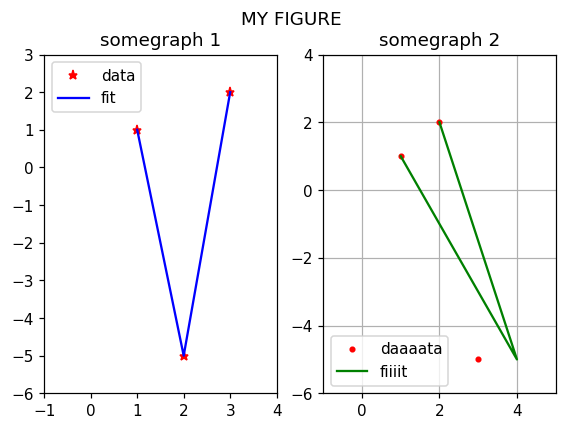

In [7]:
# standart plotting routine:
plt.figure(figsize=(6, 4), dpi=dpi_for_plot)
plt.subplot(121)
plt.plot([1,2,3], [1, -5, 2], 'r*', label='data')
plt.plot([1,2,3], [1, -5, 2], 'b', label='fit')
plt.xlim([-1,4])
plt.ylim([-6,3])
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='upper left')
plt.title('somegraph 1')

plt.subplot(122)
plt.plot([1,3,2], [1, -5, 2], 'r.', label='data')
plt.plot([1,4,2], [1, -5, 2], 'g', label='fit')
plt.xlim([-1,5])
plt.ylim([-6,4])
plt.grid()
plt.legend(['daaaata', 'fiiiit'], loc='lower left')
plt.title('somegraph 2')

plt.suptitle('MY FIGURE')

plt.savefig('protokol/img/sample_pic.png', dpi=dpi_for_export)
plt.show()

In [8]:
# import datasetu (pomoci Pandas)
# (dataset stazen z >>    )
url = "https://raw.githubusercontent.com/aleksejalex/ske_assignment/main/dataset/Data%20set%20SKE_VeteranClinicTrial_modif-RC_final4_dataset_edited_for_import_to_python.csv?token=GHSAT0AAAAAABY6GWJWO6ADKPS5D4UAOH6KY7YPZGQ"
imported_data = pd.read_csv(url)

imported_data
#data.info

,treat,cell,survt,cens,KAR,didur,age,prith
0,1,1,72,0,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
5,1,1,10,1,20,5,49,0
6,1,1,82,1,40,10,69,10
7,1,1,110,0,80,29,68,0
8,1,1,314,1,50,18,43,0
9,1,1,100,0,70,6,70,0


In [9]:
imported_data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,137,137,137,137,137,137,137,137
mean,1.49635,2.33577,121.628,0.744526,58.5693,8.77372,58.3066,2.91971
std,0.501821,1.06604,157.817,0.437728,20.0396,10.6121,10.5416,4.56337
min,1,1,1,0,10,1,34,0
25%,1,1,25,0,40,3,51,0
50%,1,2,80,1,60,5,62,0
75%,2,3,144,1,75,11,66,10
max,2,4,999,1,99,87,81,10


In [10]:
imported_data.describe().round(2).to_latex(float_format="%.2f")

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n & treat & cell & survt & cens & KAR & didur & age & prith \\\\\n\\midrule\ncount & 137.00 & 137.00 & 137.00 & 137.00 & 137.00 & 137.00 & 137.00 & 137.00 \\\\\nmean & 1.50 & 2.34 & 121.63 & 0.74 & 58.57 & 8.77 & 58.31 & 2.92 \\\\\nstd & 0.50 & 1.07 & 157.82 & 0.44 & 20.04 & 10.61 & 10.54 & 4.56 \\\\\nmin & 1.00 & 1.00 & 1.00 & 0.00 & 10.00 & 1.00 & 34.00 & 0.00 \\\\\n25% & 1.00 & 1.00 & 25.00 & 0.00 & 40.00 & 3.00 & 51.00 & 0.00 \\\\\n50% & 1.00 & 2.00 & 80.00 & 1.00 & 60.00 & 5.00 & 62.00 & 0.00 \\\\\n75% & 2.00 & 3.00 & 144.00 & 1.00 & 75.00 & 11.00 & 66.00 & 10.00 \\\\\nmax & 2.00 & 4.00 & 999.00 & 1.00 & 99.00 & 87.00 & 81.00 & 10.00 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [11]:
# moje data: vse, kde cell=2
data = pd.DataFrame()
data = imported_data[imported_data['cell']==2]

data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,48,48,48,48,48,48,48,48
mean,1.375,2,71.6667,0.75,53.5417,9.25,59.875,2.29167
std,0.489246,0,85.7749,0.437595,19.101,13.9093,9.92016,4.24744
min,1,2,2,0,20,1,35,0
25%,1,2,20,0.75,40,2,54.75,0
50%,1,2,51,1,60,4,62.5,0
75%,2,2,97.5,1,70,11,67,0
max,2,2,392,1,85,87,72,10


In [12]:
data.describe().round(2).to_latex(float_format="%.2f")

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n & treat & cell & survt & cens & KAR & didur & age & prith \\\\\n\\midrule\ncount & 48.00 & 48.00 & 48.00 & 48.00 & 48.00 & 48.00 & 48.00 & 48.00 \\\\\nmean & 1.38 & 2.00 & 71.67 & 0.75 & 53.54 & 9.25 & 59.88 & 2.29 \\\\\nstd & 0.49 & 0.00 & 85.77 & 0.44 & 19.10 & 13.91 & 9.92 & 4.25 \\\\\nmin & 1.00 & 2.00 & 2.00 & 0.00 & 20.00 & 1.00 & 35.00 & 0.00 \\\\\n25% & 1.00 & 2.00 & 20.00 & 0.75 & 40.00 & 2.00 & 54.75 & 0.00 \\\\\n50% & 1.00 & 2.00 & 51.00 & 1.00 & 60.00 & 4.00 & 62.50 & 0.00 \\\\\n75% & 2.00 & 2.00 & 97.50 & 1.00 & 70.00 & 11.00 & 67.00 & 0.00 \\\\\nmax & 2.00 & 2.00 & 392.00 & 1.00 & 85.00 & 87.00 & 72.00 & 10.00 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [13]:
data[data['cens']==0]

,treat,cell,survt,cens,KAR,didur,age,prith
20,1,2,123,0,40,3,55,0
21,1,2,97,0,60,5,67,0
23,1,2,59,0,30,2,65,0
29,1,2,21,0,40,2,55,10
31,1,2,139,0,80,2,64,0
35,1,2,287,0,60,25,66,10
38,1,2,122,0,80,28,53,0
40,1,2,54,0,70,1,67,0
90,2,2,103,0,70,22,36,10
96,2,2,7,0,20,11,66,0


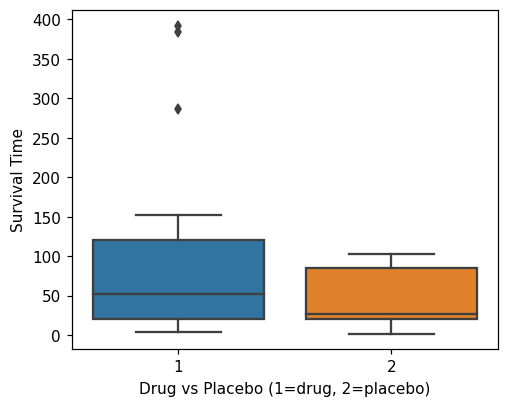

In [14]:
plt.figure(figsize=(5, 4), dpi=dpi_for_plot)
sbn.boxplot(x='treat', y='survt', data=data)
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo)')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('')
plt.savefig('protokol/img/boxplot_drug_vs_placebo.png', dpi=dpi_for_export)
plt.show()

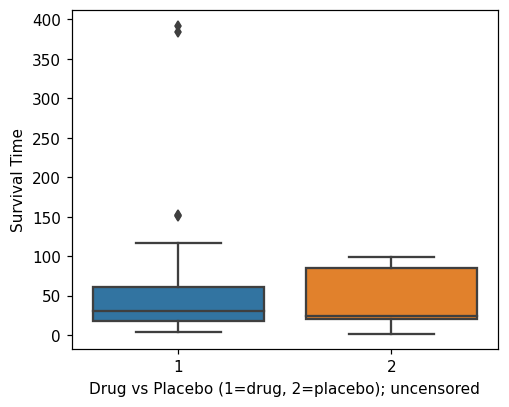

In [15]:
plt.figure(figsize=(5, 4), dpi=dpi_for_plot)
sbn.boxplot(x='treat', y='survt', data=data[data.cens==1])
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo); uncensored')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('')
plt.savefig('protokol/img/boxplot_drug_vs_placebo_uncensored.png', dpi=dpi_for_export)
plt.show()

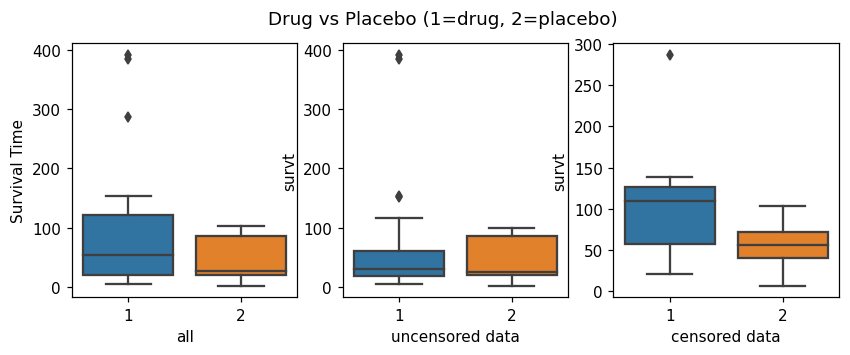

In [16]:
#plt.subplots(figsize = (9,3), dpi=dpi_for_plot, nrows=1, ncols=3)
plt.figure(figsize = (9,3), dpi=dpi_for_plot)
plt.subplot(131)
sbn.boxplot(x='treat', y='survt', data=data)
plt.xlabel('all')
plt.ylabel('Survival Time')
plt.title('')
plt.subplot(132)
sbn.boxplot(x='treat', y='survt', data=data[data.cens==1])
plt.xlabel('uncensored data')
#plt.ylabel('Survival Time')
plt.suptitle('')
plt.subplot(133)
sbn.boxplot(x='treat', y='survt', data=data[data.cens==0])
plt.xlabel('censored data')
#plt.ylabel('Survival Time')
plt.suptitle('Drug vs Placebo (1=drug, 2=placebo)')
plt.title('')
plt.savefig('protokol/img/boxplot_drug_vs_placebo_BOTH.png', dpi=dpi_for_export, bbox_inches="tight")
plt.show()

z toho bych usoudil, že experiment neprobíhal dost dlouho pro tuto skupinu pacientů (cell=2): je vidět, že pacienti, kteří přežili do konce experimentu

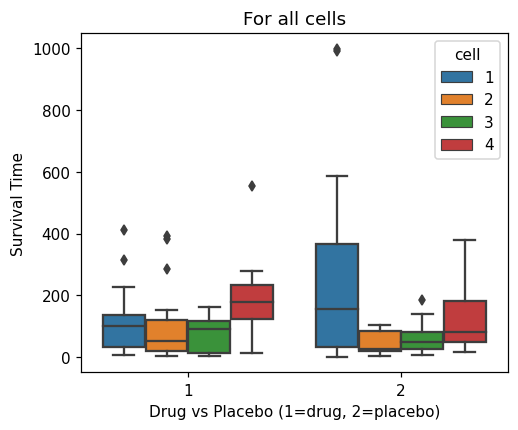

In [17]:
plt.figure(figsize=(5, 4), dpi=dpi_for_plot)
sbn.boxplot(x='treat', y='survt', data=imported_data, hue='cell')
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo)')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('For all cells')
plt.savefig('protokol/img/boxplot_drug_vs_placebo_whole_dataset.png', dpi=dpi_for_export)
plt.show()

In [18]:
who

csv	 data	 dpi_for_export	 dpi_for_plot	 examplevarr	 gauss	 imported_data	 inspect	 mpt	 
np	 pd	 plt	 rel	 retrieve_name	 sbn	 scp	 sm	 statsmodels	 
url	 


In [19]:
len(data[data.treat == 1])

30

In [24]:
len(data[data.treat == 2])

18

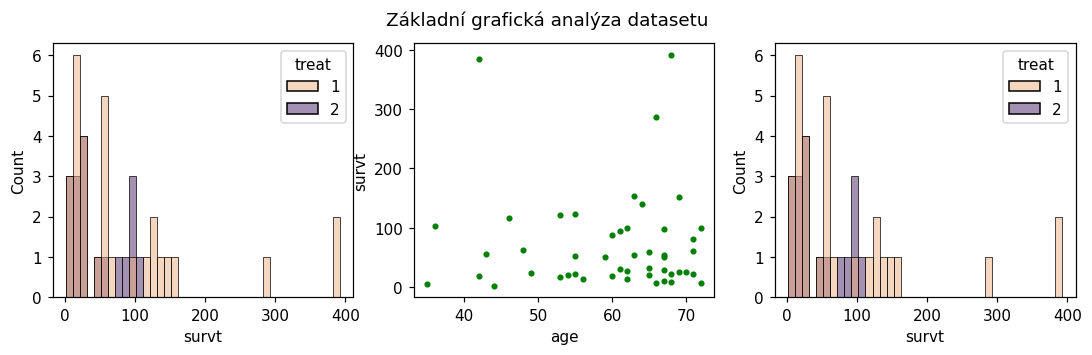

In [25]:
plt.subplots(figsize = (12,3), dpi=dpi_for_plot, nrows=1, ncols=3)
plt.subplot(131)
sbn.histplot(data=data, x='survt', binwidth=10, hue='treat', palette='flare')
plt.subplot(132)
plt.plot(data.age, data.survt, '.' ,color='green')
plt.xlabel('age')
plt.ylabel('survt')
plt.subplot(133)
sbn.histplot(data=data, x='survt', binwidth=10, hue='treat', palette='flare')
plt.suptitle('Základní grafická analýza datasetu')
plt.savefig('protokol/img/basic_data_analysis.png', dpi=dpi_for_export)
plt.show()

In [26]:
# splitting my dataset into two: drugs and placebo patients
data_drug = pd.DataFrame()
data_drug = data[data['treat']==1]
data_placebo = pd.DataFrame()
data_placebo = data[data['treat']==2]

In [27]:
data_drug.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,30,30,30,30,30,30,30,30
mean,1,2,86.3667,0.733333,54.8333,7.4,58.7333,2.33333
std,0,0,102.592,0.449776,17.7377,7.24735,9.72353,4.30183
min,1,2,4,0,20,1,35,0
25%,1,2,20.25,0.25,40,3,53.5,0
50%,1,2,53,1,60,4,62.5,0
75%,1,2,120.75,1,67.5,10.5,66.75,0
max,1,2,392,1,80,28,72,10


In [28]:
data_placebo.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,18,18,18,18,18,18,18,18
mean,2,2,47.1667,0.777778,51.3889,12.3333,61.7778,2.22222
std,0,0,37.0028,0.427793,21.5438,20.7166,10.23,4.27793
min,2,2,2,0,20,1,36,0
25%,2,2,20.25,1,30,2,59.25,0
50%,2,2,27,1,55,4,64,0
75%,2,2,85.25,1,70,10.5,69.75,0
max,2,2,103,1,85,87,72,10


# Parametric fits for patients on drugs

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 22/8 (26.66667% right censored) 

   Distribution   Alpha     Beta   Gamma Alpha 1   Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
       Gamma_3P 270.719 0.498064  3.9999                                                                                    -120.394 247.711 250.991 3.78279       TNC
     Weibull_3P 106.134  0.61087  3.9999                                                                                    -120.934 248.792 252.073 3.65602       TNC
Weibull_Mixture                           56.568  1.09815 389.964 116.374     0.758537                                      -118.037 248.573 253.079 3.59253    powell
 Loglogistic_3P 57.7984 0.775869  3.9999                                                                                    -122.664 252.251 255.532 3.53831       TNC
     Weibull_CR                          128.491 0.744

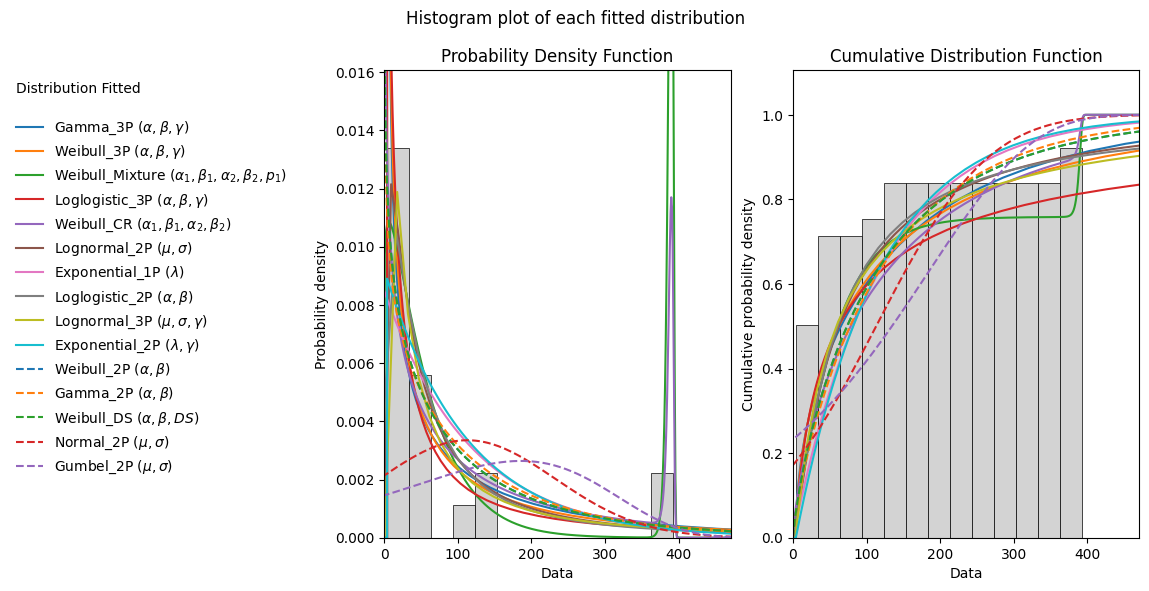

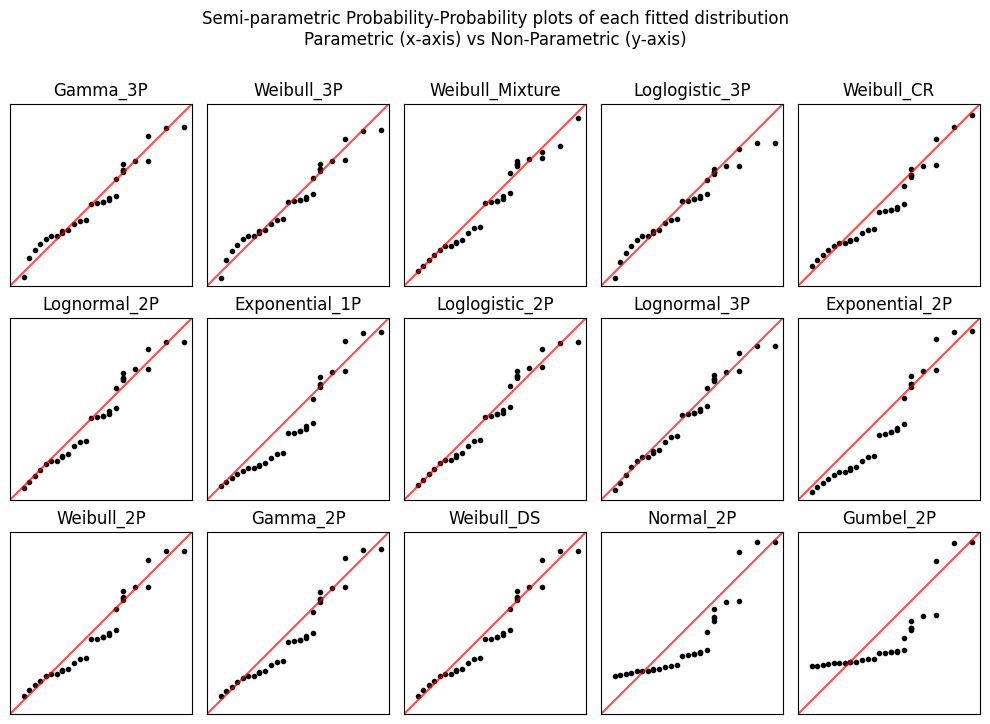

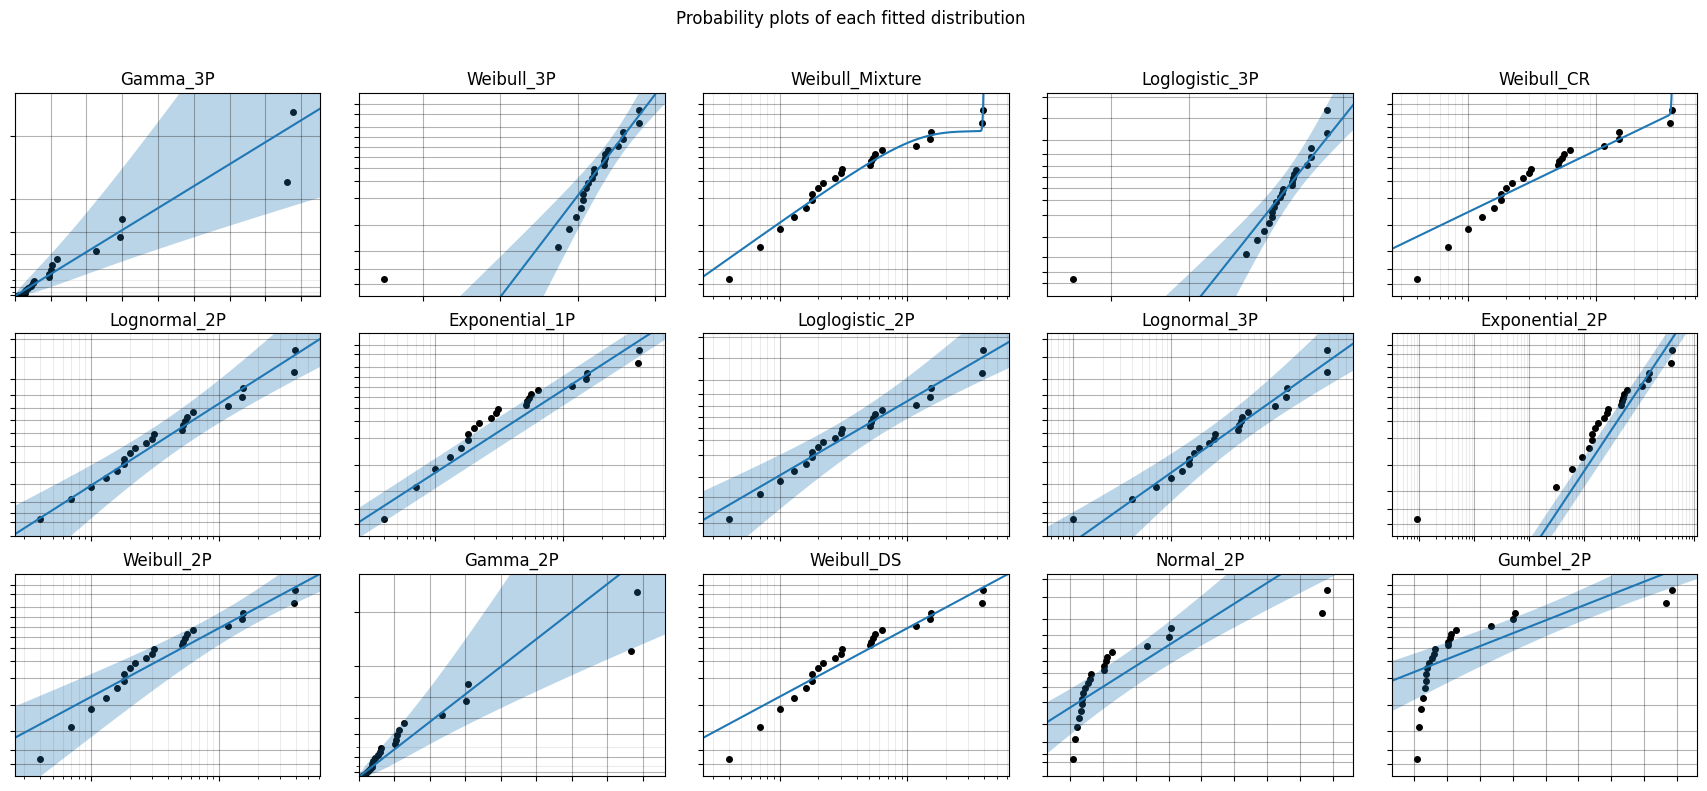

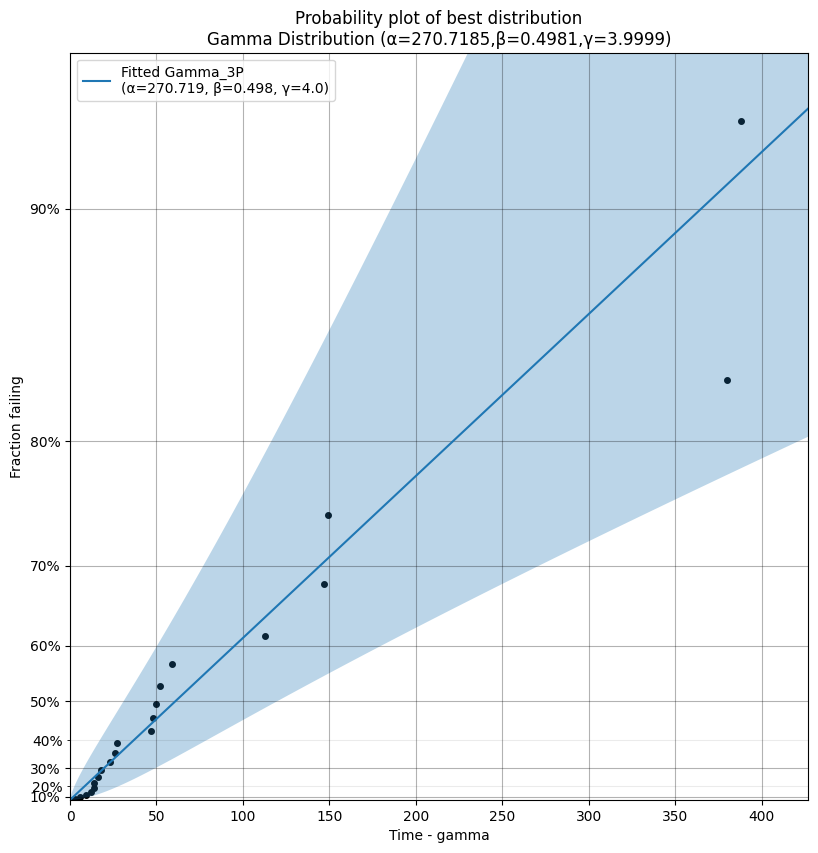

The best fitting distribution was Gamma_3P  which had parameters  [270.71853611   0.49806422   3.9999    ]


<Figure size 640x480 with 0 Axes>

In [29]:
from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import make_right_censored_data

results_drug = Fit_Everything(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values)
print('The best fitting distribution was', results_drug.best_distribution_name, ' which had parameters ', results_drug.best_distribution.parameters)
plt.savefig('protokol/img/fitall_datadrug_censored.png', dpi=dpi_for_export)

In [30]:
results_drug.probability_plot.savefig('protokol/img/fiteverything_drug_PP_plots.png', dpi=dpi_for_export*1.4)

In [31]:
results_drug.histogram_plot.savefig('protokol/img/fiteverything_drugs_histogram.png', dpi=dpi_for_export)

In [32]:
results_drug.PP_plot.savefig('protokol/img/fiteverything_drug_real_PP_plots.png', dpi=dpi_for_export*1.4)

Results from Fit_Lognormal_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22/8 (26.66667% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu         4.12884        0.270364   3.59893   4.65874
    Sigma         1.39198        0.217242   1.02516   1.89007 

Goodness of fit    Value
 Log-likelihood -124.588
           AICc   253.62
            BIC  255.978
             AD  3.60495 

Results from Fit_Gamma_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22/8 (26.66667% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         270.719         121.165   112.603   650.861
     Beta        0.498064        0.115732  0.315862  0.785369
    Gamma          3.9999     0.000139302   3.99963   4.00017 

Goodness of fit    Value
 Log-likelihood -120.394
           AICc  247.711
            BIC  250.991
 

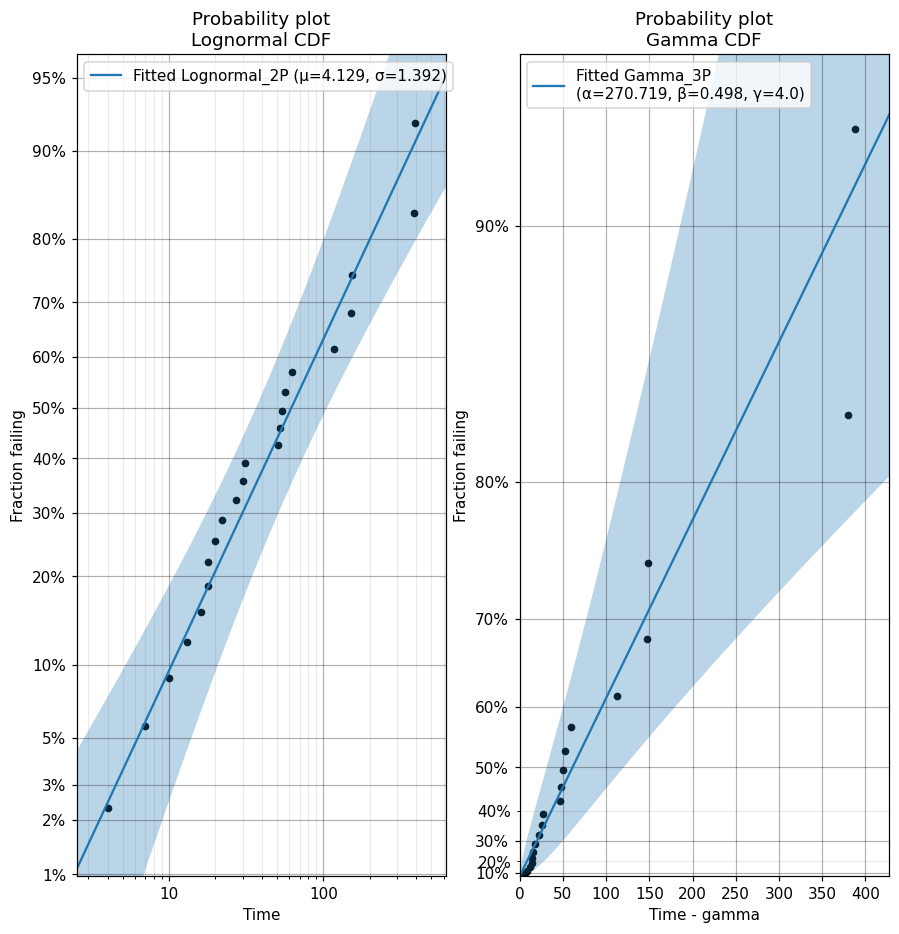

In [33]:
from reliability.Fitters import Fit_Lognormal_2P
from reliability.Fitters import Fit_Gamma_3P
from reliability.Other_functions import make_right_censored_data, histogram

plt.figure(figsize=(6,3), dpi=dpi_for_plot)
plt.subplot(121)
fitted_drugs_logNorm2p = Fit_Lognormal_2P(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values).distribution
plt.subplot(122)
fitted_drugs_Gamma3p = Fit_Gamma_3P(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values).distribution
plt.savefig('protokol/img/fitted_drugs_logNorm_and_Gamma.png', dpi=dpi_for_export)
plt.show()

# Nonparametric fits for patients on drugs

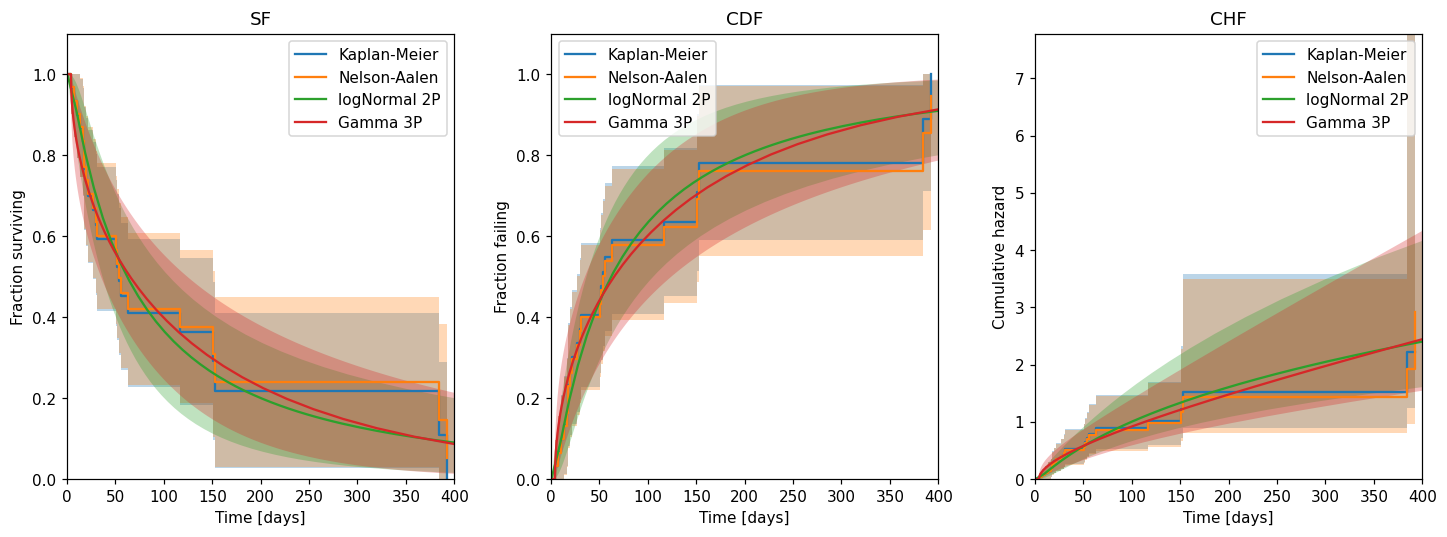

In [34]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen

plt.figure(figsize=(14, 5), dpi=dpi_for_plot)
plt.subplot(131)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
fitted_drugs_logNorm2p.SF(label='logNormal 2P')
fitted_drugs_Gamma3p.SF(label='Gamma 3P')
plt.xlim(0,400)
plt.xlabel('Time [days]')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
fitted_drugs_logNorm2p.CDF(label='logNormal 2P')
fitted_drugs_Gamma3p.CDF(label='Gamma 3P')
plt.xlim(0,400)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
fitted_drugs_logNorm2p.CHF(label='logNormal 2P')
fitted_drugs_Gamma3p.CHF(label='Gamma 3P')
plt.xlim(0,400)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CHF') 
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.savefig('protokol/img/four_men_drugs.png', dpi=dpi_for_export)
plt.show()

# Parametric fits for patients on placebo

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 14/4 (22.22222% right censored) 

   Distribution   Alpha     Beta    Gamma Alpha 1   Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma    Lambda  Log-likelihood    AICc     BIC      AD optimizer
Weibull_Mixture                           20.7431  2.22503  98.212 12.9256     0.528143                                     -63.6664 142.333 141.785 6.16063       TNC
       Gamma_3P 118.424 0.548677   1.9999                                                                                   -68.4463 144.607 145.564 6.82239       TNC
 Exponential_1P                                                                                              0.01649          -71.47  145.19  145.83 6.43969       TNC
     Weibull_CR                           86.3238 0.855303 100.283 17.2318                                                  -67.4178 145.913 146.397  6.2595       TNC
 Exponential_2P                    1.9999             

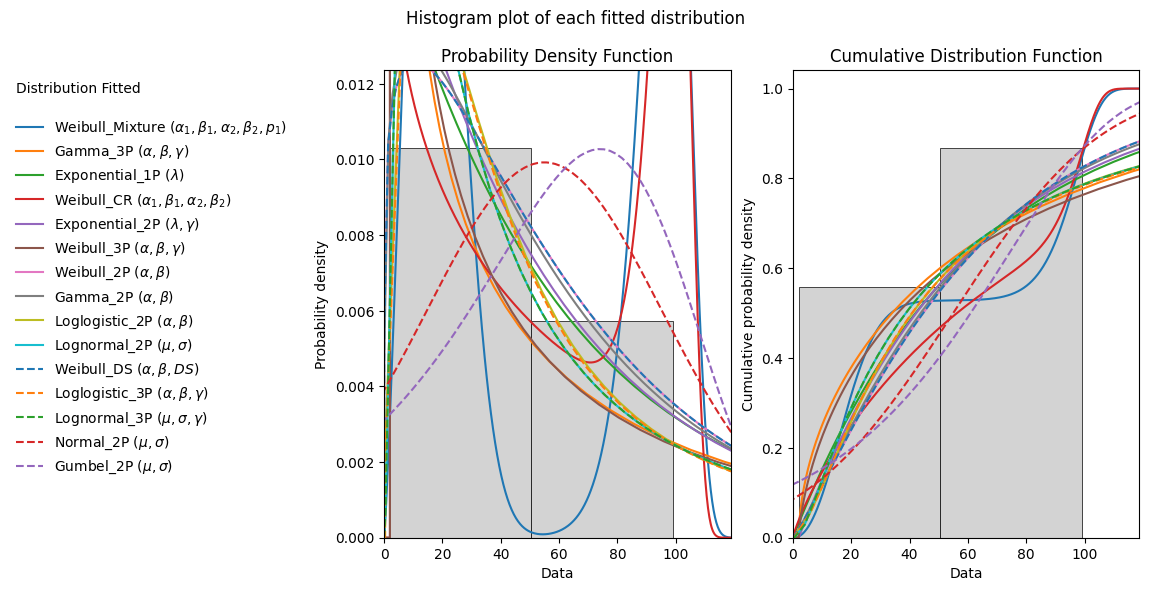

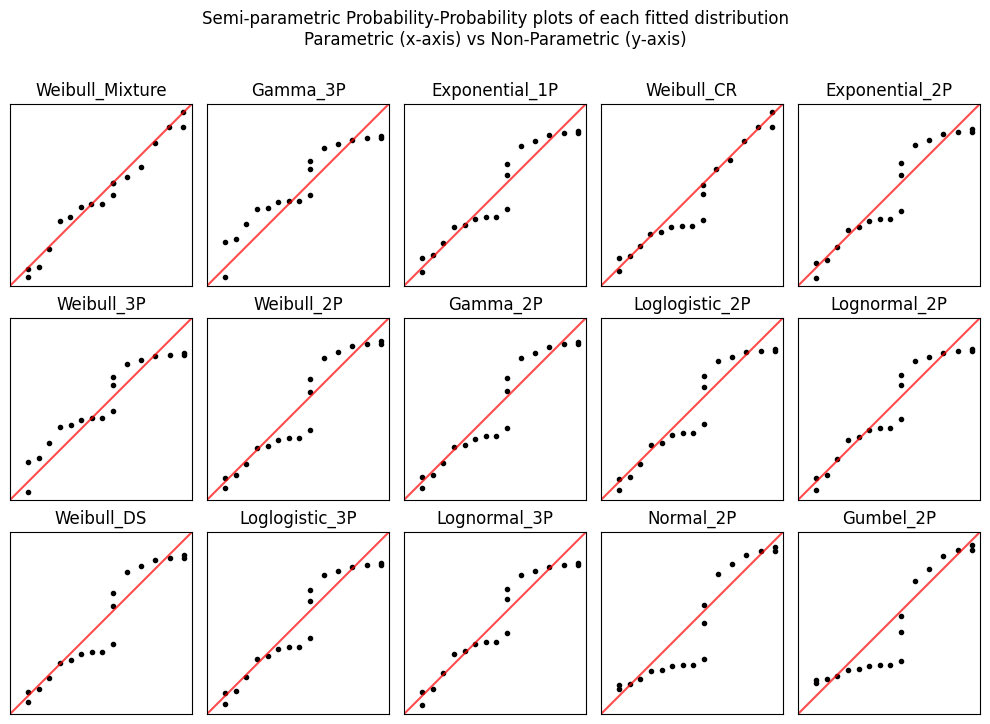

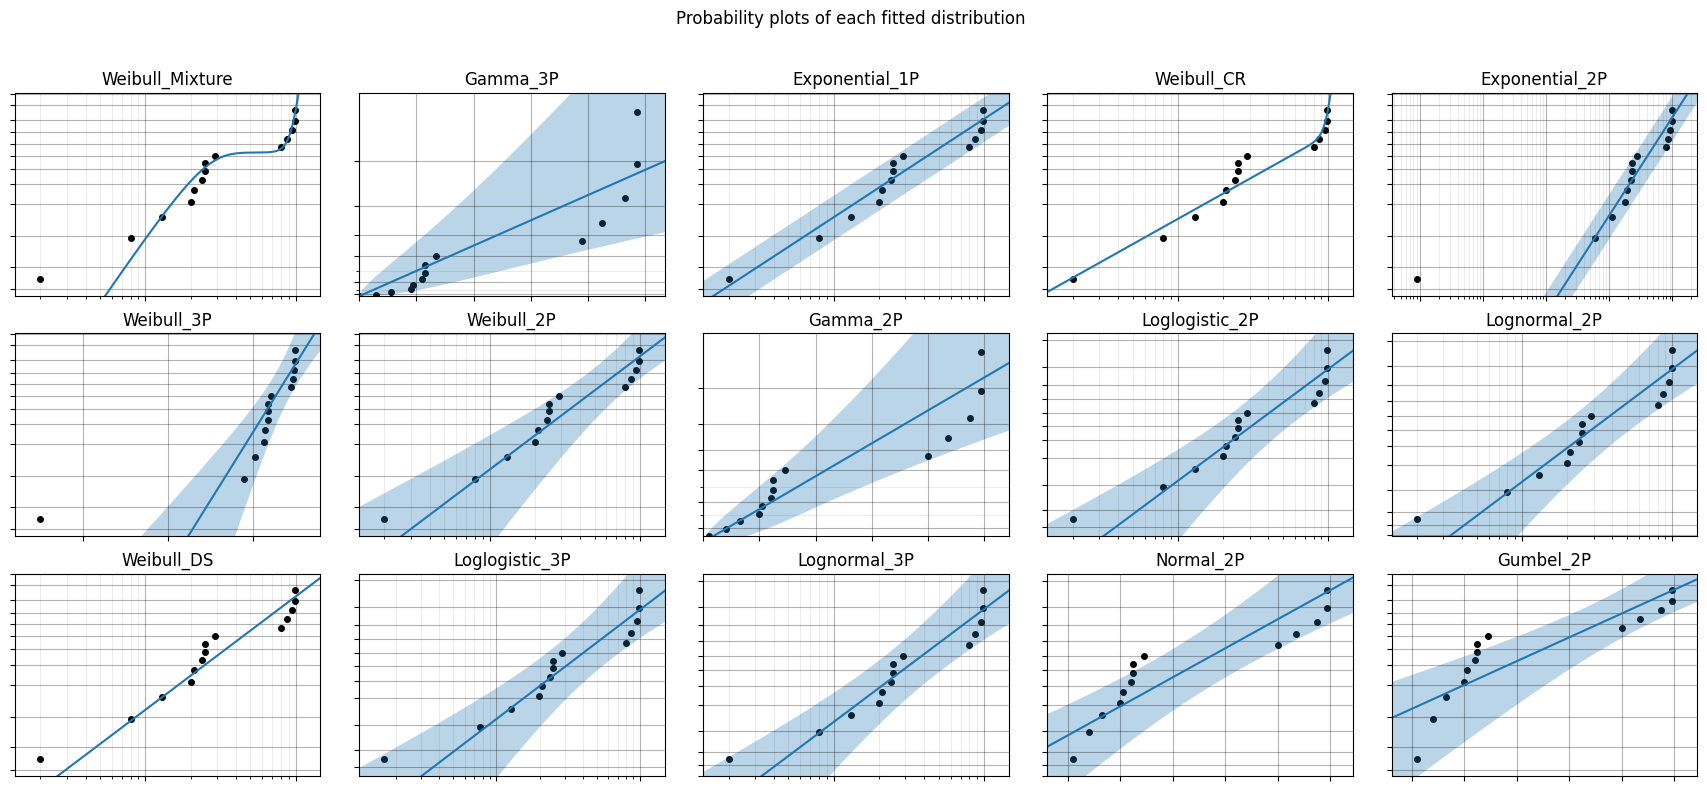

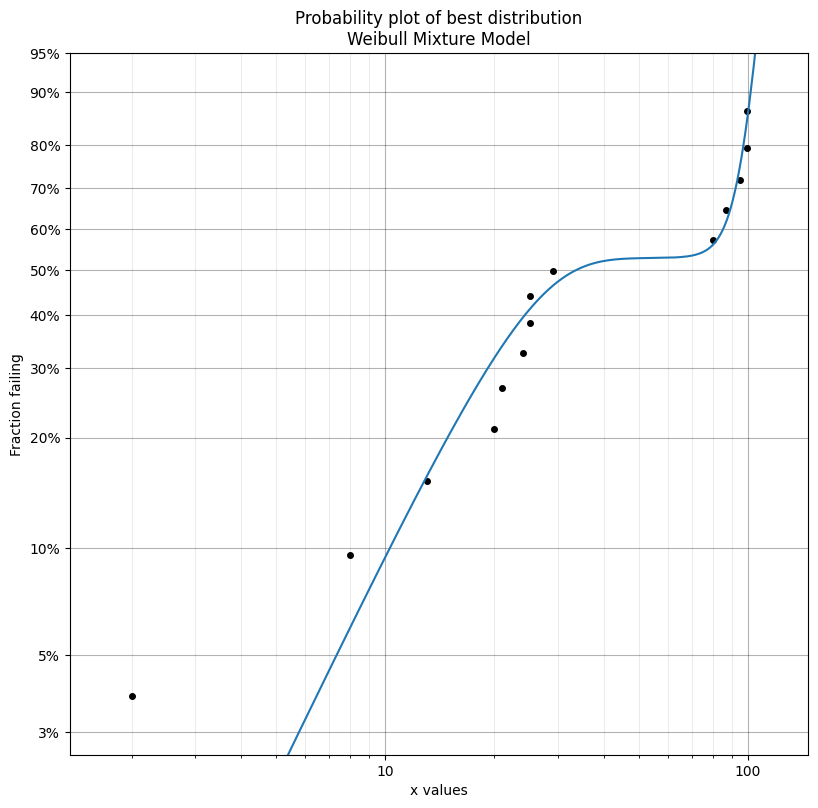

In [35]:
results_placebo = Fit_Everything(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values)
#print('The best fit was', results_placebo.best_distribution_name, ' which had parameters ', results_placebo.best_distribution.parameters)

In [36]:
results_placebo.probability_plot.savefig('protokol/img/fiteverything_placebo_PP_plots.png', dpi=dpi_for_export)

In [37]:
results_placebo.histogram_plot.savefig('protokol/img/fiteverything_placebo_histogram.png', dpi=dpi_for_export)

Results from Fit_Exponential_1P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 14/4 (22.22222% right censored) 

Parameter  Point Estimate  Standard Error   Lower CI  Upper CI
   Lambda         0.01649      0.00440713 0.00976623 0.0278428
 1/Lambda         60.6429         16.2075    35.9159   102.394 

Goodness of fit   Value
 Log-likelihood  -71.47
           AICc  145.19
            BIC  145.83
             AD 6.43969 

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 14/4 (22.22222% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         61.3516         14.2945   38.8599   96.8611
     Beta         1.15275        0.254117  0.748325   1.77573 

Goodness of fit    Value
 Log-likelihood -71.2739
           AICc  147.348
            BIC  148.329
             AD  6.50281 



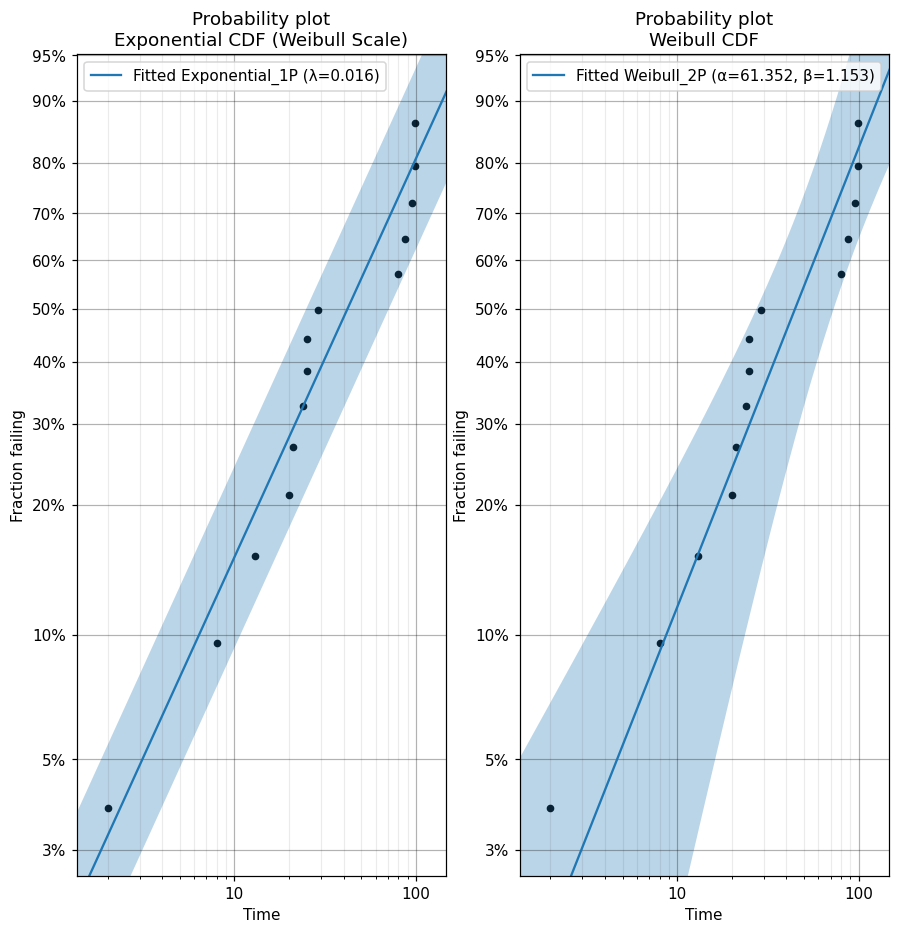

In [38]:
from reliability.Fitters import Fit_Exponential_1P
from reliability.Fitters import Fit_Weibull_2P
from reliability.Other_functions import make_right_censored_data, histogram

plt.figure(figsize=(6,3), dpi=dpi_for_plot)
plt.subplot(121)
fitted_placebo_Exponential1p = Fit_Exponential_1P(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values).distribution
plt.subplot(122)
fitted_placebo_Weibull2p = Fit_Weibull_2P(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values).distribution
plt.savefig('protokol/img/fitted_placebo_Exp1p_and_weibull2p.png', dpi=dpi_for_export) 

# Nonparametric fits for patients on placebo

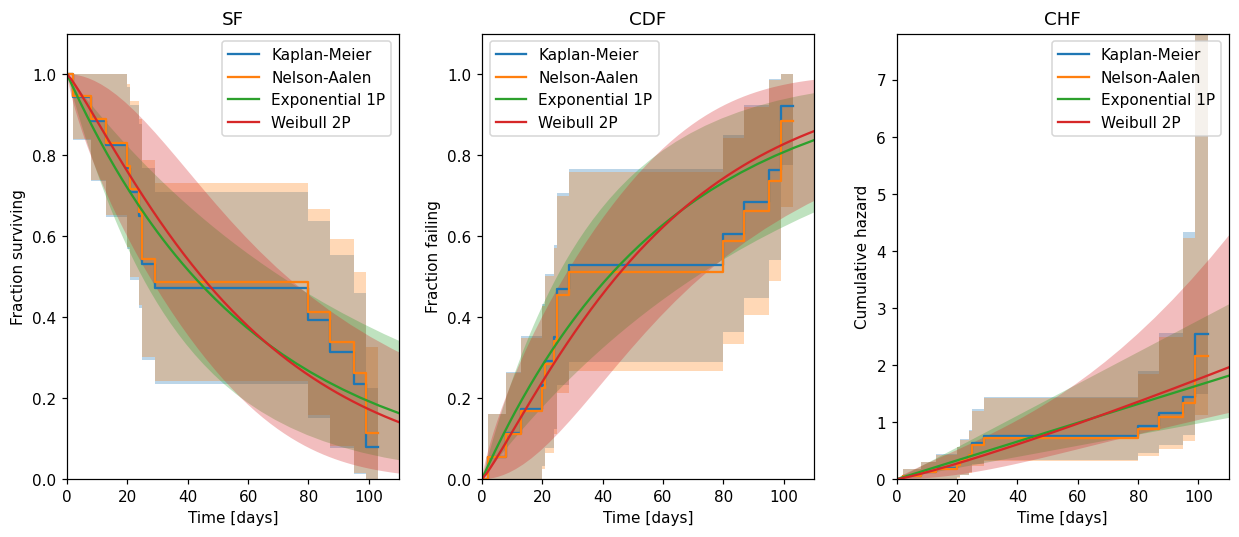

In [39]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen

plt.figure(figsize=(12, 5), dpi=dpi_for_plot)
plt.subplot(131)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
fitted_placebo_Exponential1p.SF(label='Exponential 1P')
fitted_placebo_Weibull2p.SF(label='Weibull 2P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
fitted_placebo_Exponential1p.CDF(label='Exponential 1P')
fitted_placebo_Weibull2p.CDF(label='Weibull 2P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
fitted_placebo_Exponential1p.CHF(label='Exponential 1P')
fitted_placebo_Weibull2p.CHF(label='Weibull 2P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.savefig('protokol/img/four_men_placebo_compared_to_parametrics.png', dpi=dpi_for_export)
plt.show()

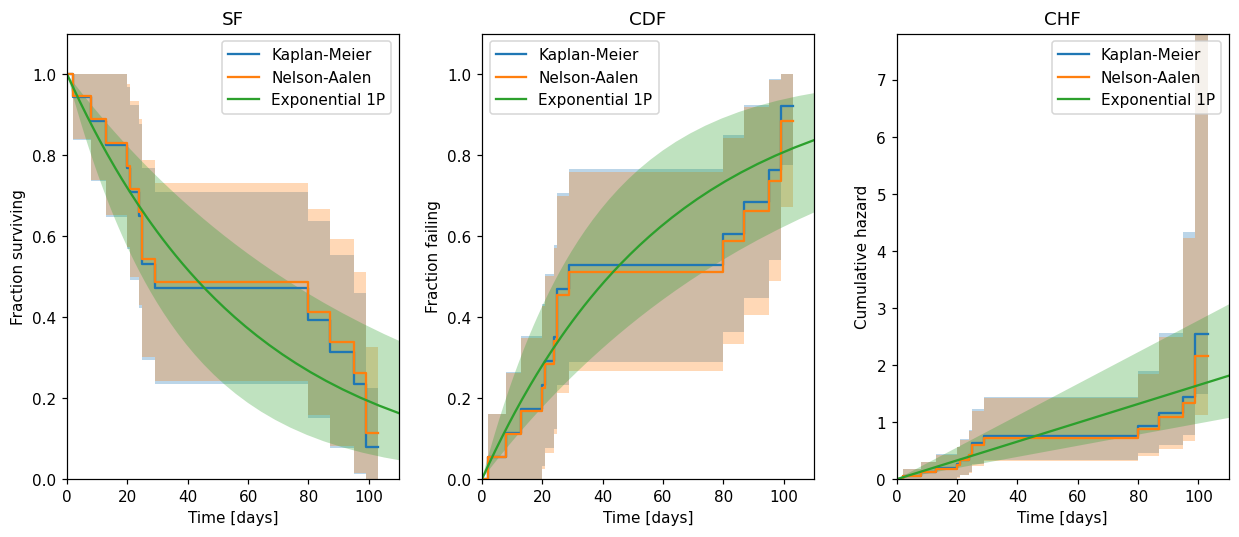

In [40]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen

plt.figure(figsize=(12, 5), dpi=dpi_for_plot)
plt.subplot(131)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
fitted_placebo_Exponential1p.SF(label='Exponential 1P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
fitted_placebo_Exponential1p.CDF(label='Exponential 1P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
fitted_placebo_Exponential1p.CHF(label='Exponential 1P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.savefig('protokol/img/four_men_placebo_Exponential_1P.png', dpi=dpi_for_export)
plt.show()

In [41]:
# ########################################################################################
# PROBLEM !!!!!!!!!!!!!!!!!!!!
# z nejakeho duvodu ctyri muzi predikuji jen do dne 100, a dal uz nechteji. Cim to?????
# ########################################################################################

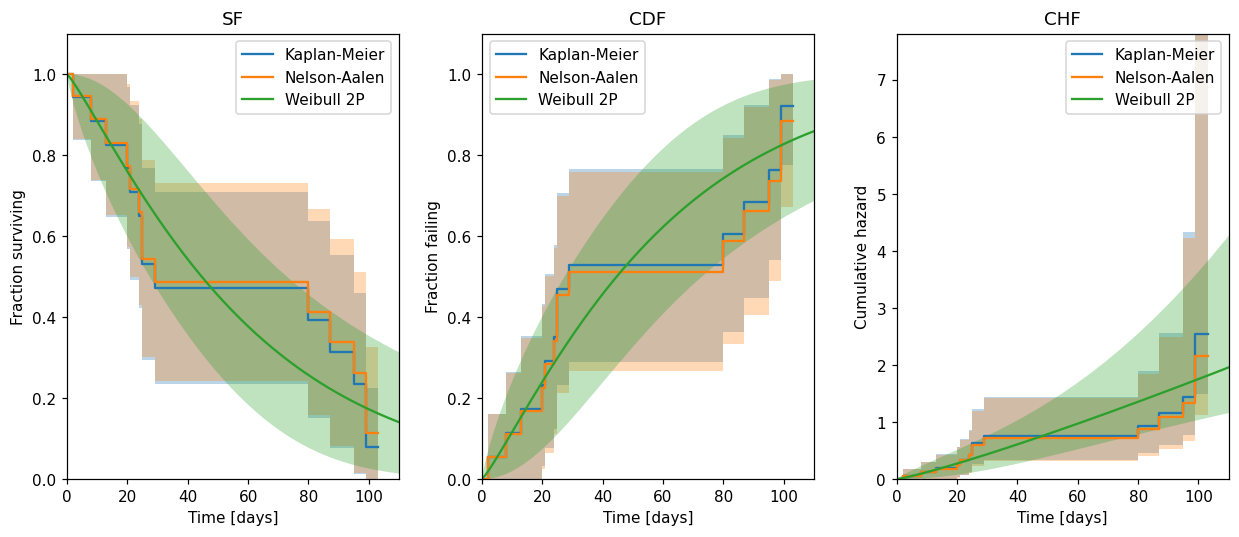

In [42]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen

plt.figure(figsize=(12, 5), dpi=dpi_for_plot)
plt.subplot(131)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
fitted_placebo_Weibull2p.SF(label='Weibull 2P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
fitted_placebo_Weibull2p.CDF(label='Weibull 2P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
fitted_placebo_Weibull2p.CHF(label='Weibull 2P')
plt.xlim(0,110)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.savefig('protokol/img/four_men_placebo_Weibull_2P.png', dpi=dpi_for_export)
plt.show()

# Survival fction Drugs vs placebo

## for parametric estimation

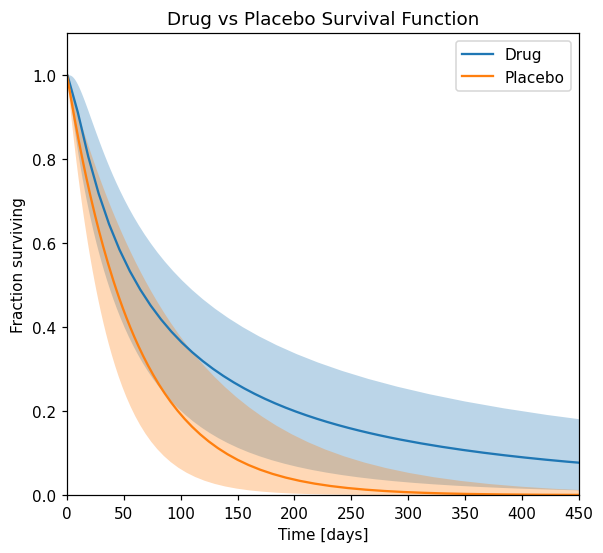

In [43]:
plt.figure(figsize=(6,6), dpi=dpi_for_plot)
fitted_drugs_logNorm2p.SF(label='Drug')
fitted_placebo_Exponential1p.SF(label='Placebo')
plt.xlim(0,450)
plt.legend()
plt.xlabel('Time [days]')
plt.title('Drug vs Placebo Survival Function')
plt.savefig('protokol/img/survival_function_drug_vs_placebo_parametric.png', dpi=dpi_for_export)
plt.show()

In [44]:
data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,48,48,48,48,48,48,48,48
mean,1.375,2,71.6667,0.75,53.5417,9.25,59.875,2.29167
std,0.489246,0,85.7749,0.437595,19.101,13.9093,9.92016,4.24744
min,1,2,2,0,20,1,35,0
25%,1,2,20,0.75,40,2,54.75,0
50%,1,2,51,1,60,4,62.5,0
75%,2,2,97.5,1,70,11,67,0
max,2,2,392,1,85,87,72,10


## for nonparametric estimation

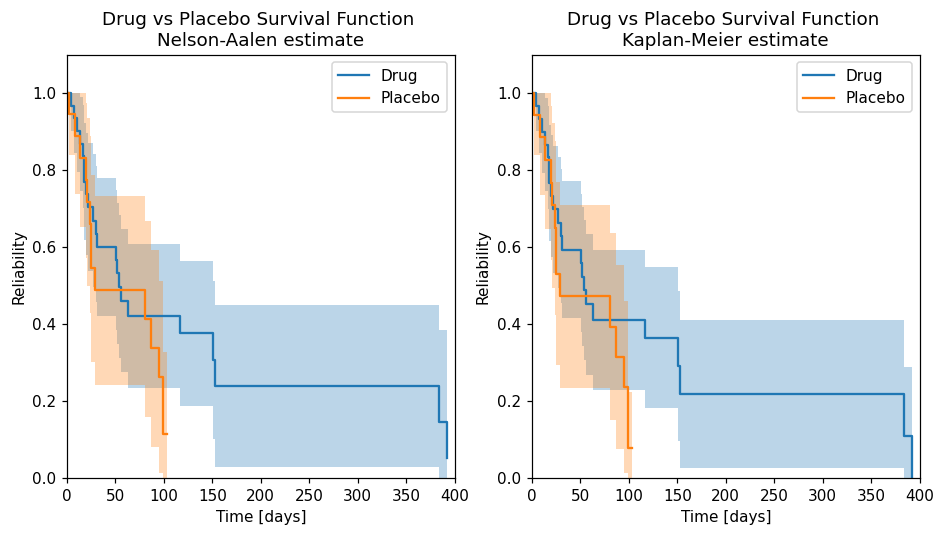

In [45]:
plt.figure(figsize=(10, 5), dpi=dpi_for_plot)

plt.subplot(121)
fitted_NA_drug = NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='SF', print_results=False, label='Drug')
fitted_NA_placebo = NelsonAalen(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Placebo', print_results=False, plot_type='SF')
plt.title('Drug vs Placebo Survival Function \nNelson-Aalen estimate')
plt.xlim(0,400)
plt.xlabel('Time [days]')
plt.legend()

plt.subplot(122)
fitted_KM_drug = KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='SF', print_results=False, label='Drug')
fitted_KM_placebo = KaplanMeier(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values, label='Placebo', print_results=False, plot_type='SF')
plt.xlim(0,400)
plt.title('Drug vs Placebo Survival Function \nKaplan-Meier estimate')
plt.xlabel('Time [days]')
plt.legend()

plt.savefig('protokol/img/survival_function_drug_vs_placebo_NON_parametric.png', dpi=dpi_for_export)
plt.show()

# TTT plot

In [46]:
# TTT = total time in test / total time on test (plot)

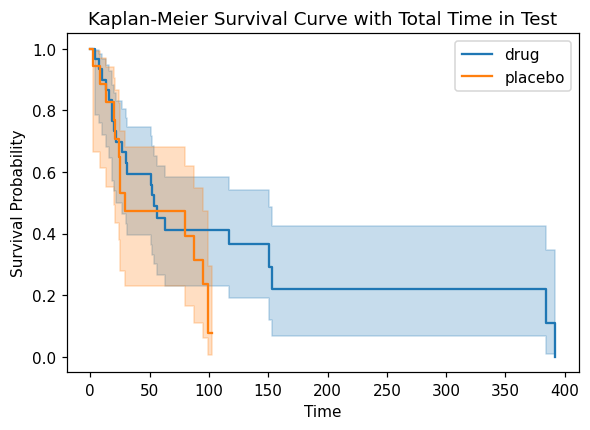

In [47]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load your survival data
#data = pd.read_csv('survival_data.csv')  # Replace with your data source

# Assuming 'time' is the survival time column and 'event' is the event indicator column
kmf_drug = KaplanMeierFitter()
kmf_placebo = KaplanMeierFitter()

# Fit the Kaplan-Meier survival curve
#kmf.fit(data['survt'], event_observed=data['cens'])
kmf_drug.fit(data_drug['survt'], event_observed=data_drug.cens)
kmf_placebo.fit(data_placebo['survt'], event_observed=data_placebo.cens)

# Plot the survival curve with the total time in test
plt.figure(figsize=(6, 4), dpi=dpi_for_plot)
kmf_drug.plot(label='drug')
kmf_placebo.plot(label='placebo')
plt.title('Kaplan-Meier Survival Curve with Total Time in Test')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.savefig('protokol/img/TTTplot_using_KM.png', dpi=dpi_for_export)
plt.show()

# Hazard rate & cummulative hazard rateon

## Hazard function

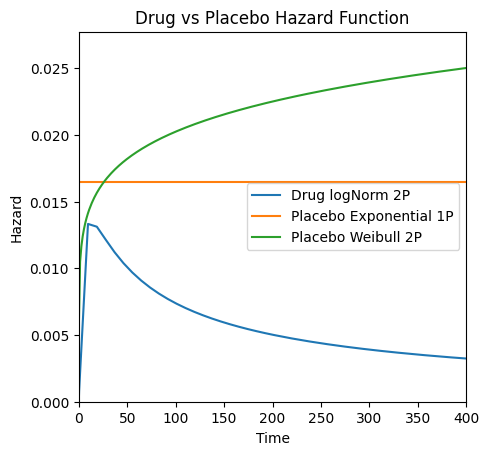

In [48]:
plt.figure(figsize=(5, 5))
#fitted_drugs_Gamma3p.HF(label='Drug Gamma 3P')
fitted_drugs_logNorm2p.HF(label='Drug logNorm 2P')
fitted_placebo_Exponential1p.HF(label='Placebo Exponential 1P')
fitted_placebo_Weibull2p.HF(label='Placebo Weibull 2P')
plt.legend()
plt.xlim(0,400)
plt.xlabel('Time')
plt.title('Drug vs Placebo Hazard Function')

plt.savefig('protokol/img/hazard_rate_drug_vs_placebo_parametric.png', dpi=dpi_for_export)
plt.show()

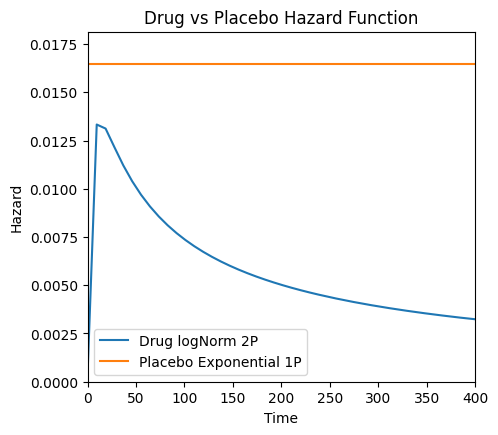

In [49]:
# co jsem sam vybral vyse

plt.figure(figsize=(5, 5))
fitted_drugs_logNorm2p.HF(label='Drug logNorm 2P')
fitted_placebo_Exponential1p.HF(label='Placebo Exponential 1P')
plt.legend()
plt.xlim(0,400)
plt.xlabel('Time')
plt.title('Drug vs Placebo Hazard Function')

plt.savefig('protokol/img/hazard_rate_drug_vs_placebo_parametric_my_choice.png', dpi=dpi_for_export)
plt.show()

In [50]:
# Dalsi problem !!!!!! Gamma 3P dava takovy hazard rate, ze ostatni vubec nejsou videt!!!!!!!!!!

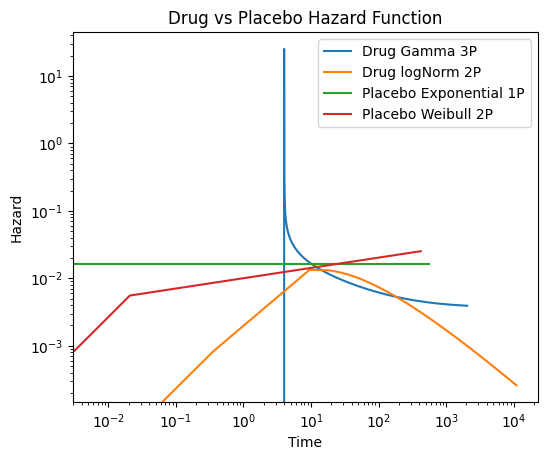

In [51]:
plt.figure(figsize=(6, 5))
fitted_drugs_Gamma3p.HF(label='Drug Gamma 3P')
fitted_drugs_logNorm2p.HF(label='Drug logNorm 2P')
fitted_placebo_Exponential1p.HF(label='Placebo Exponential 1P')
fitted_placebo_Weibull2p.HF(label='Placebo Weibull 2P')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time')
plt.title('Drug vs Placebo Hazard Function')

plt.savefig('protokol/img/hazard_rate_drug_vs_placebo_parametric_LOGLOG_scale.png', dpi=dpi_for_export)
plt.show()

Zde je vidět, že intenzita poruch (hazard rate) roste

## cumulative hazard function

# Statistics

In [52]:
fitted_drugs_Gamma3p.stats()
print('-------------------------------------------------------------------------------------------------------------\n')
fitted_drugs_logNorm2p.stats()
print('-------------------------------------------------------------------------------------------------------------\n')
fitted_placebo_Exponential1p.stats()
print('-------------------------------------------------------------------------------------------------------------\n')
fitted_placebo_Weibull2p.stats()

Descriptive statistics for Gamma distribution with alpha = 270.718536111354, beta = 0.49806422198871636, and gamma = 3.9999
Mean =  138.83511706622573
Median = 65.13022157912404
Mode = 3.9999
5th quantile = 4.519325172806259
95th quantile = 522.679999163243
Standard deviation = 191.05599331197462
Variance = 36502.39258042529
Skewness = 2.833918281425474
Excess kurtosis = 12.04663923869627
-------------------------------------------------------------------------------------------------------------

Descriptive statistics for Lognormal distribution with mu = 4.1288364608854 and sigma = 1.3919838243612772
Mean =  163.636244744973
Median = 62.10561856200182
Mode = 8.946098304477854
5th quantile = 6.291671777137862
95th quantile = 613.0497574562759
Standard deviation = 398.89004496297736
Variance = 159113.2679705661
Skewness = 21.798075545884604
Excess kurtosis = 3130.407145222999
-------------------------------------------------------------------------------------------------------------



## fitting KM

In [53]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter

fitter_KM_drug = KaplanMeierFitter()
fitter_KM_drug.fit(data_drug.survt, event_observed=data_drug.cens)
print('Kaplan_Meier')
print('---------------------------------\npatients treated with a drug:\nt_med = ', fitter_KM_drug.median_survival_time_)

fitter_KM_placebo = KaplanMeierFitter()
fitter_KM_placebo.fit(data_placebo.survt, event_observed=data_placebo.cens)
print('---------------------------------\npatients treated with a placebo:\nt_med = ',fitter_KM_placebo.median_survival_time_)

Kaplan_Meier
---------------------------------
patients treated with a drug:
t_med =  54.0
---------------------------------
patients treated with a placebo:
t_med =  29.0


# Coxuv model

## overeni predpokladu

In [54]:
# logrank test

In [55]:
from lifelines.statistics import logrank_test

LR_test = logrank_test(data_drug.survt.values, data_placebo.survt.values, event_observed_A = data_drug.cens.values, event_observed_B = data_placebo.cens.values)
LR_test.print_summary()
print(LR_test.p_value)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.74 0.19      2.42

0.1873767429360759


p-value 0.187 means that we would not reject null hypothesis at the significance level $\alpha = 0.05 $ (and even at the level $\alpha = 0.1 $)

In [56]:
# log-log plot (based on Kaplan Mayer)

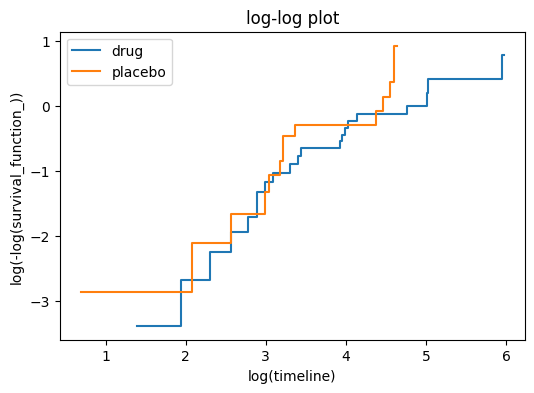

In [57]:
plt.figure(figsize=(6, 4))
fitter_KM_drug.plot_loglogs(label='drug')
fitter_KM_placebo.plot_loglogs(label='placebo')
plt.legend(['drug', 'placebo'])
plt.title('log-log plot')

plt.savefig('protokol/img/loglogplot_KM.png', dpi=dpi_for_export)
plt.show()

In [58]:
# check for perfect separation in dataset:

# Identify unique combinations of predictor variables
unique_combinations = data.groupby(['cens'])['survt'].unique()

# Check for perfect separation
for combination, outcomes in unique_combinations.items():
    if len(outcomes) == 1:
        print(f"Perfect separation detected for combination: {combination}")

In [59]:
len(outcomes)

31

In [60]:
# check fo r perfect separation in dataset:

# Identify unique combinations of predictor variables
unique_combinations = data[data['treat']==1].groupby(['cens'])['survt'].unique()

print(unique_combinations)

# Check for perfect separation
for combination, outcomes in unique_combinations.items():
    if len(outcomes) == 1:
        print(f"Perfect separation detected for combination: {combination}")

cens
0                 [123, 97, 59, 21, 139, 287, 122, 54]
1    [30, 384, 4, 54, 13, 153, 117, 16, 151, 22, 56...
Name: survt, dtype: object


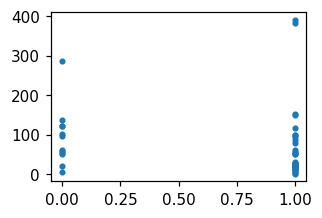

In [61]:
plt.figure(figsize=(3,2), dpi=dpi_for_plot)
plt.plot(data.cens, data.survt, '.')
plt.show()

## samotny Coxuv test

In [62]:
from lifelines import CoxPHFitter

In [63]:
# zalozime fitter, overime predpoklady built-in metodou

In [64]:
cph = CoxPHFitter()       # alpha=0.01

In [65]:
cph.fit(data, duration_col='survt', event_col='cens', show_progress=True, fit_options={"step_size": 0.0000001, "max_steps": 10000000})
cph.check_assumptions(data, show_plots=True)

ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

In [ ]:
cph.fit(data[data['cens']==1], duration_col='survt', show_progress=True)
cph.check_assumptions(data, show_plots=True)

In [ ]:
cph2 = CoxPHFitter(step_size=0.1)
cph22 = cph2.fit(data, 'survt', show_progress=True)

axes = cph2.check_assumptions(data, show_plots=True)

In [ ]:
print(cph.summary())

# Cox model implemented by ChatGPT

In [ ]:
import numpy as np

# Generate some example survival data
np.random.seed(42)
n_samples = 100
n_features = 2

X = np.random.randn(n_samples, n_features)
beta = np.array([0.5, -0.2])
true_hazard = np.exp(np.dot(X, beta))
event_times = np.random.exponential(scale=1/true_hazard)

# Implement the Cox Proportional Hazards model
def cox_model(X, beta):
    linear_predictor = np.dot(X, beta)
    hazard_ratio = np.exp(linear_predictor)
    return hazard_ratio

# Fit the Cox model
def fit_cox_model(X, event_times, max_iterations=1000, learning_rate=0.01):
    n_samples, n_features = X.shape
    beta = np.zeros(n_features)
    
    for iteration in range(max_iterations):
        hazard_ratio = cox_model(X, beta)
        expected_event_times = -np.log(hazard_ratio)
        partial_likelihood = 0
        
        for i in range(n_samples):
            if event_times[i] > 0:
                partial_likelihood += X[i] - np.sum(X * hazard_ratio[i])
        
        gradient = partial_likelihood / n_samples
        beta += learning_rate * gradient
        #print(f'beta = {beta}')
    
    return beta

# Fit the Cox model using the provided data
learned_beta = fit_cox_model(X, event_times)
print("True Beta:", beta)
print("Learned Beta:", learned_beta)


# Regrese

In [ ]:
import statsmodels.formula.api as sm
model_lin_reg_1 = sm.ols(formula = "survt ~ 1", data = data)
results_lin_reg_1 = model_lin_reg_1.fit()

print(results_lin_reg_1.summary())

In [ ]:
model_lin_reg = sm.ols(formula = "survt ~ treat + age + KAR + didur + prith", data = imported_data)
results_lin_reg = model_lin_reg.fit()

print(results_lin_reg.summary())

In [ ]:
plt.scatter(results_lin_reg.fittedvalues, results_lin_reg.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
fig = smm.graphics.plot_partregress_grid(results_lin_reg)
fig.tight_layout(pad=0.8)
plt.show()

In [ ]:
#import pandas as pd
import statsmodels.api as smm   # CAREFULL - different package, different shortcut

# Load your data
#data = pd.read_csv('your_data.csv')  # Replace with your data source

# Assuming 'hungry' is the outcome variable and other predictors are 'predictor1', 'predictor2', ...
X = data[['cens', 'age', 'KAR']]  # Replace with actual predictor variables
y = data['survt']  # Replace with actual outcome variable

# Add a constant term to the predictor matrix
X = smm.add_constant(X)

# Fit a logistic regression model
model = smm.OLS(y, X)
result = model.fit()

print(result.summary())

# Check for potential perfect separation
if 'Perfect separation detected' in result.summary().as_text():
    print("Potential perfect separation detected.")
else:
    print("No potential perfect separation detected.")


# Machine learning approach (NN)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing input features and the target variable.
# Make sure 'data' contains all the features and the target in separate columns.

# Split the DataFrame into input features (x) and target variable (y)
X = data.drop('survt', axis=1)  # Drop the column containing the target
y = data['survt']  # Extract the target column

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(keras.Input(shape=7))
model.add(layers.Dense(7, activation="relu", name="Hidden_Layer_1"))
model.add(layers.Dense(3, activation="relu", name="Hidden_Layer_2"))
model.add(layers.Dense(1, activation="sigmoid", name="Output_Layer"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=4,
                    validation_data=(x_test, y_test),
)

In [ ]:
model.weights

In [ ]:
model

# NN proposed by ChatGPT

In [ ]:
# convert dataframes to tensors

input_features = data.drop('survt', axis=1)
x_tensor_train = torch.tensor(input_features.values, dtype=torch.float32)

# Convert the 'target' column to a PyTorch tensor (if needed)
y_tensor_train = torch.tensor(data['survt'].values, dtype=torch.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Prepare your data as tensors
# X_train: Input features tensor (size: num_samples x num_features)
# y_train: Target (survival times) tensor (size: num_samples)

# Step 2: Define the neural network architecture
class SimpleSurvivalNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleSurvivalNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Step 3: Define the loss function (Custom Cox Proportional Hazards Loss)
def cox_loss(y_pred, y_survival, y_censor):
    # Implement the Cox proportional hazards partial log-likelihood loss here
    # You may need to sort and handle censored data accordingly
    #  ...... below is suggested implementation of Cox loss .......................................
    # y_pred: Predicted log hazard ratios from the model (size: num_samples)
    # y_survival: Observed survival times (size: num_samples)
    # y_censor: Censoring status (1 if censored, 0 if event occurred) (size: num_samples)

    # Sort the samples based on survival times in ascending order
    sorted_indices = torch.argsort(y_survival)
    y_pred_sorted = y_pred[sorted_indices]
    y_survival_sorted = y_survival[sorted_indices]
    y_censor_sorted = y_censor[sorted_indices]

    # Calculate the log cumulative hazard at each event time
    log_cumulative_hazard = torch.cumsum(y_pred_sorted.exp() * y_censor_sorted, dim=0)

    # Calculate the log sum of hazards over observed events
    log_sum_hazards_observed = torch.log(log_cumulative_hazard)

    # Calculate the log sum of hazards over all samples
    log_sum_hazards_all = torch.log(torch.cumsum(y_pred_sorted.exp(), dim=0))

    # Calculate the Cox Proportional Hazards Loss
    cox_loss = torch.sum(y_pred_sorted - log_sum_hazards_observed + log_sum_hazards_all)

    return cox_loss

# Step 4: Training
def train_model(X_train, y_train, num_epochs, batch_size, lr):
    model = SimpleSurvivalNet(input_size=X_train.shape[1], hidden_size=64, output_size=1)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        for i in range(0, X_train.shape[0], batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            y_pred = model(batch_X)
            loss = cox_loss(y_pred, batch_y, y_censor=X_train[:,2])  # Implement your custom Cox loss function

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Call the training function with your data and other hyperparameters
# train_model(X_train, y_train, num_epochs=100, batch_size=32, lr=0.001)


In [ ]:
train_model(x_tensor_train, y_tensor_train, num_epochs=100, batch_size=32, lr=0.001)

In [ ]:
# takto vypada cens priznak v jazyce tensoru
x_tensor_train[:,2]

In [ ]:
x_train

In [ ]:
who

## another NN proposed by ChatGPT

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset into a pandas DataFrame (replace 'data.csv' with your file)
#data = pd.read_csv('data.csv')

# Assuming the target variable is named 'target'
X = data.drop('survt', axis=1)
y = data['survt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Assuming it's a regression task

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss}")


In [ ]:
import matplotlib.pyplot as plt

# Get model predictions for the test set
y_pred = model.predict(X_test_scaled)

# Create scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlim([0,60])
plt.ylim([0,60])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

# Polynomial fit (ChatGPT)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your dataset into a pandas DataFrame (replace 'data.csv' with your file)
#data = pd.read_csv('data.csv')

# Assuming the x values are in the 'x' column and the y values in the 'y' column
x_data = data['age']
y_data = data['survt']

# Define the function you want to fit (in this case, a polynomial function)
def polynomial_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve to the data using curve_fit
params, covariance = curve_fit(polynomial_func, x_data, y_data)

# Get the optimized parameters
a_fit, b_fit, c_fit, d_fit = params

# Generate points for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = polynomial_func(x_fit, a_fit, b_fit, c_fit, d_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('age')
plt.ylabel('survt')
plt.title('Fitting a Curve to Data')
plt.legend()
plt.show()

In [ ]:
# Fit the curve to the data using curve_fit
params, covariance = curve_fit(gauss, x_data, y_data)

# Get the optimized parameters
mi_fit, sigma_fit = params

# Generate points for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = gauss(x_fit, mi_fit, sigma_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('age')
plt.ylabel('survt')
plt.title('Fitting a Curve to Data')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your dataset into a pandas DataFrame (replace 'data.csv' with your file)
#data = pd.read_csv('data.csv')

# Assuming the x values are in the 'x' column and the y values in the 'y' column
x_data = data['cens']
y_data = data['survt']

# Define the function you want to fit (in this case, a polynomial function)
def polynomial_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the curve to the data using curve_fit
params, covariance = curve_fit(polynomial_func, x_data, y_data)

# Get the optimized parameters
a_fit, b_fit, c_fit = params

# Generate points for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = polynomial_func(x_fit, a_fit, b_fit, c_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('cens')
plt.ylabel('survt')
plt.title('Fitting a Curve to Data')
plt.legend()
plt.show()

In [ ]:
whos


# odpad

In [ ]:
plt.figure(figsize=(6, 5))
fitted_drugs_Gamma3p.HF(label='Drug Gamma 3P')
fitted_drugs_logNorm2p.HF(label='Drug logNorm 2P')
fitted_placebo_Exponential1p.HF(label='Placebo Exponential 1P')
fitted_placebo_Weibull2p.HF(label='Placebo Weibull 2P')
plt.legend(loc='upper right')
plt.xlim(0,1e160)
plt.ylim(0,1e160)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time')
plt.title('Drug vs Placebo Hazard Function')

plt.savefig('protokol/img/hazard_rate_drug_vs_placebo_parametric_LOGLOG_scale_2.png', dpi=dpi_for_export)
plt.show()

# Pairplots (slow to compile!!!)

C:\Users\lenov\Documents\GitHub\ske_assignment\venv_ske\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


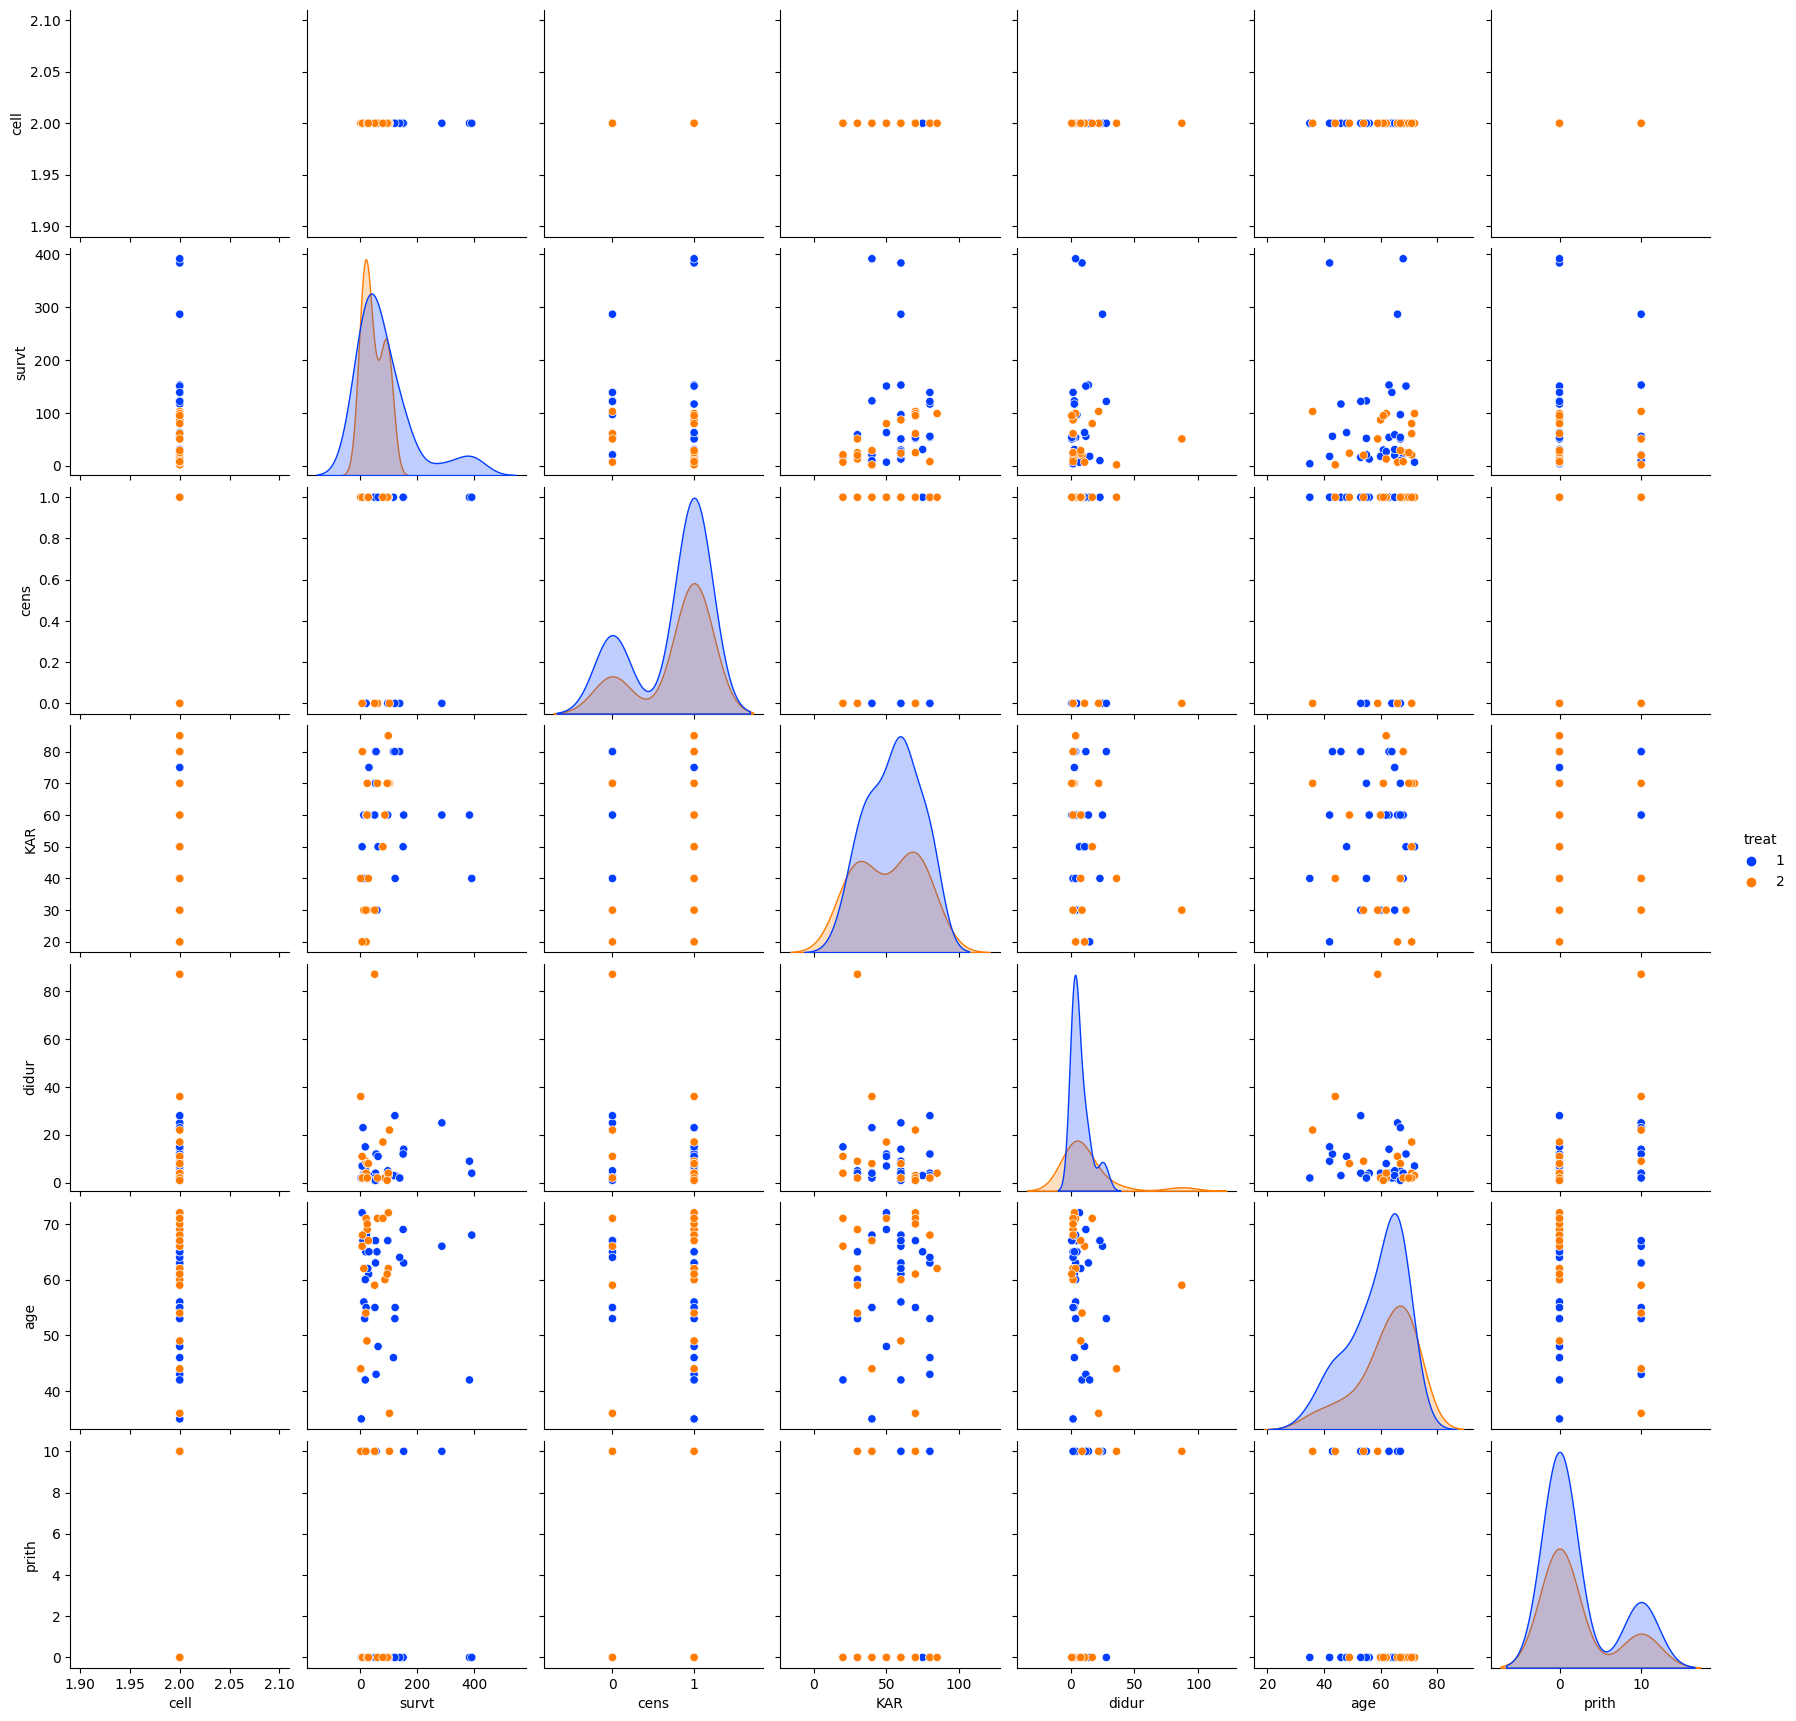

In [68]:
sbn.pairplot(data=data, hue='treat', palette='bright')
plt.savefig('protokol/img/pairplot_my_dataset.png', dpi=2500)
plt.show()

C:\Users\lenov\Documents\GitHub\ske_assignment\venv_ske\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


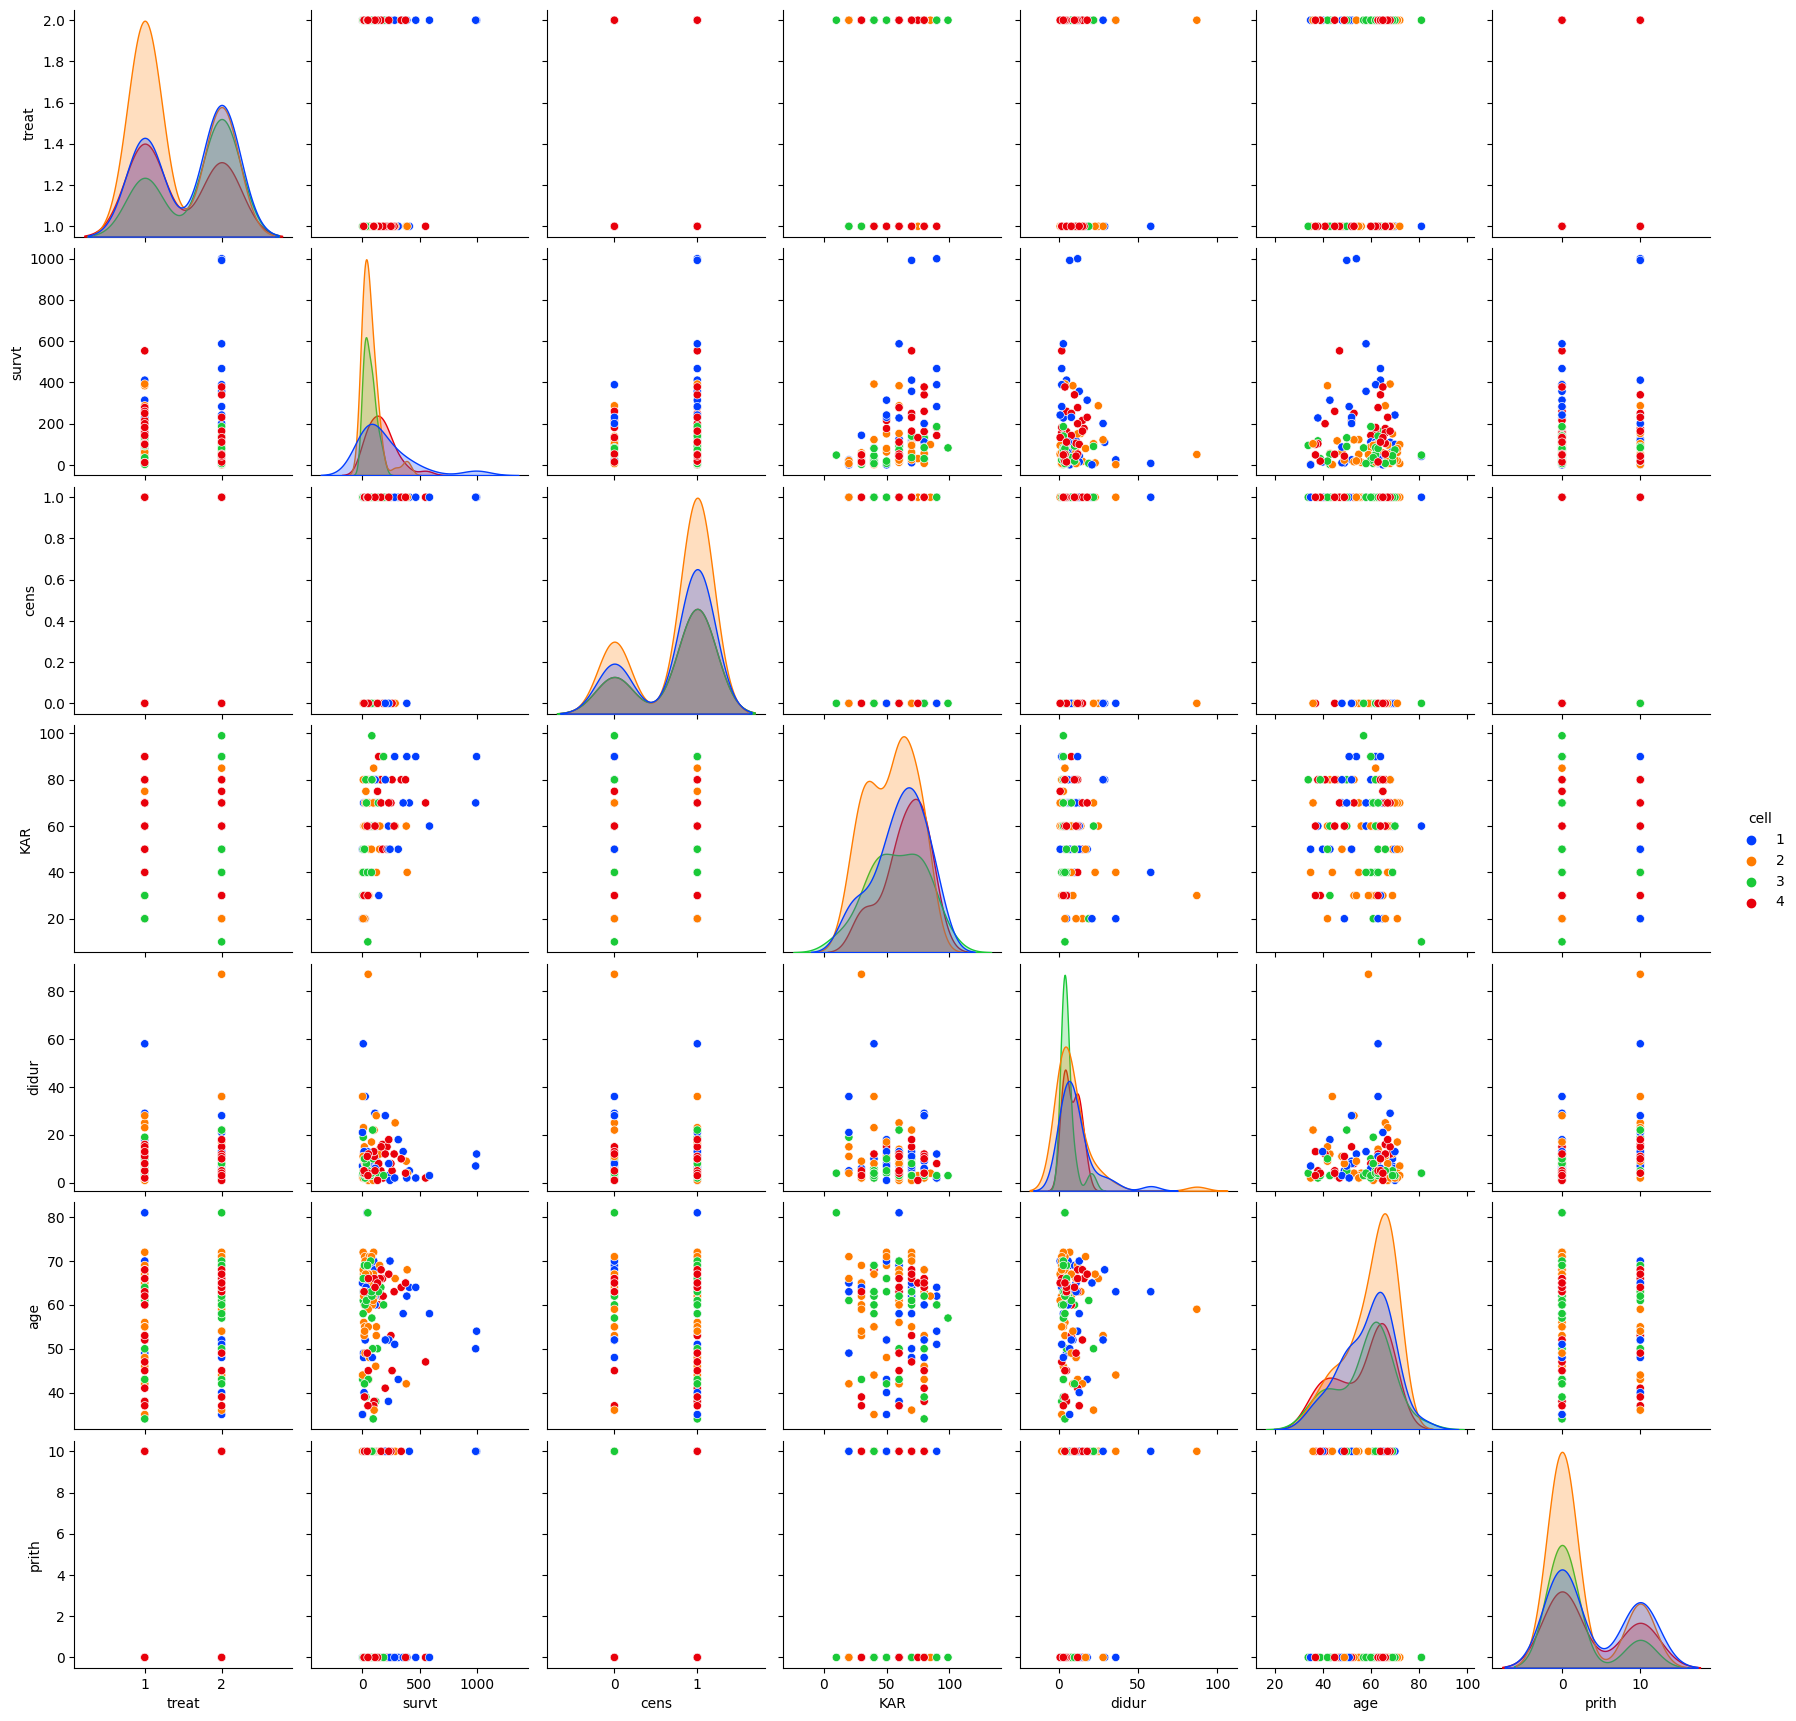

In [67]:
sbn.pairplot(data=imported_data, hue='cell', palette='bright')
plt.savefig('protokol/img/pairplot_whole_dataset_hue_by_cells.png', dpi=2500)
plt.show()

C:\Users\lenov\Documents\GitHub\ske_assignment\venv_ske\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


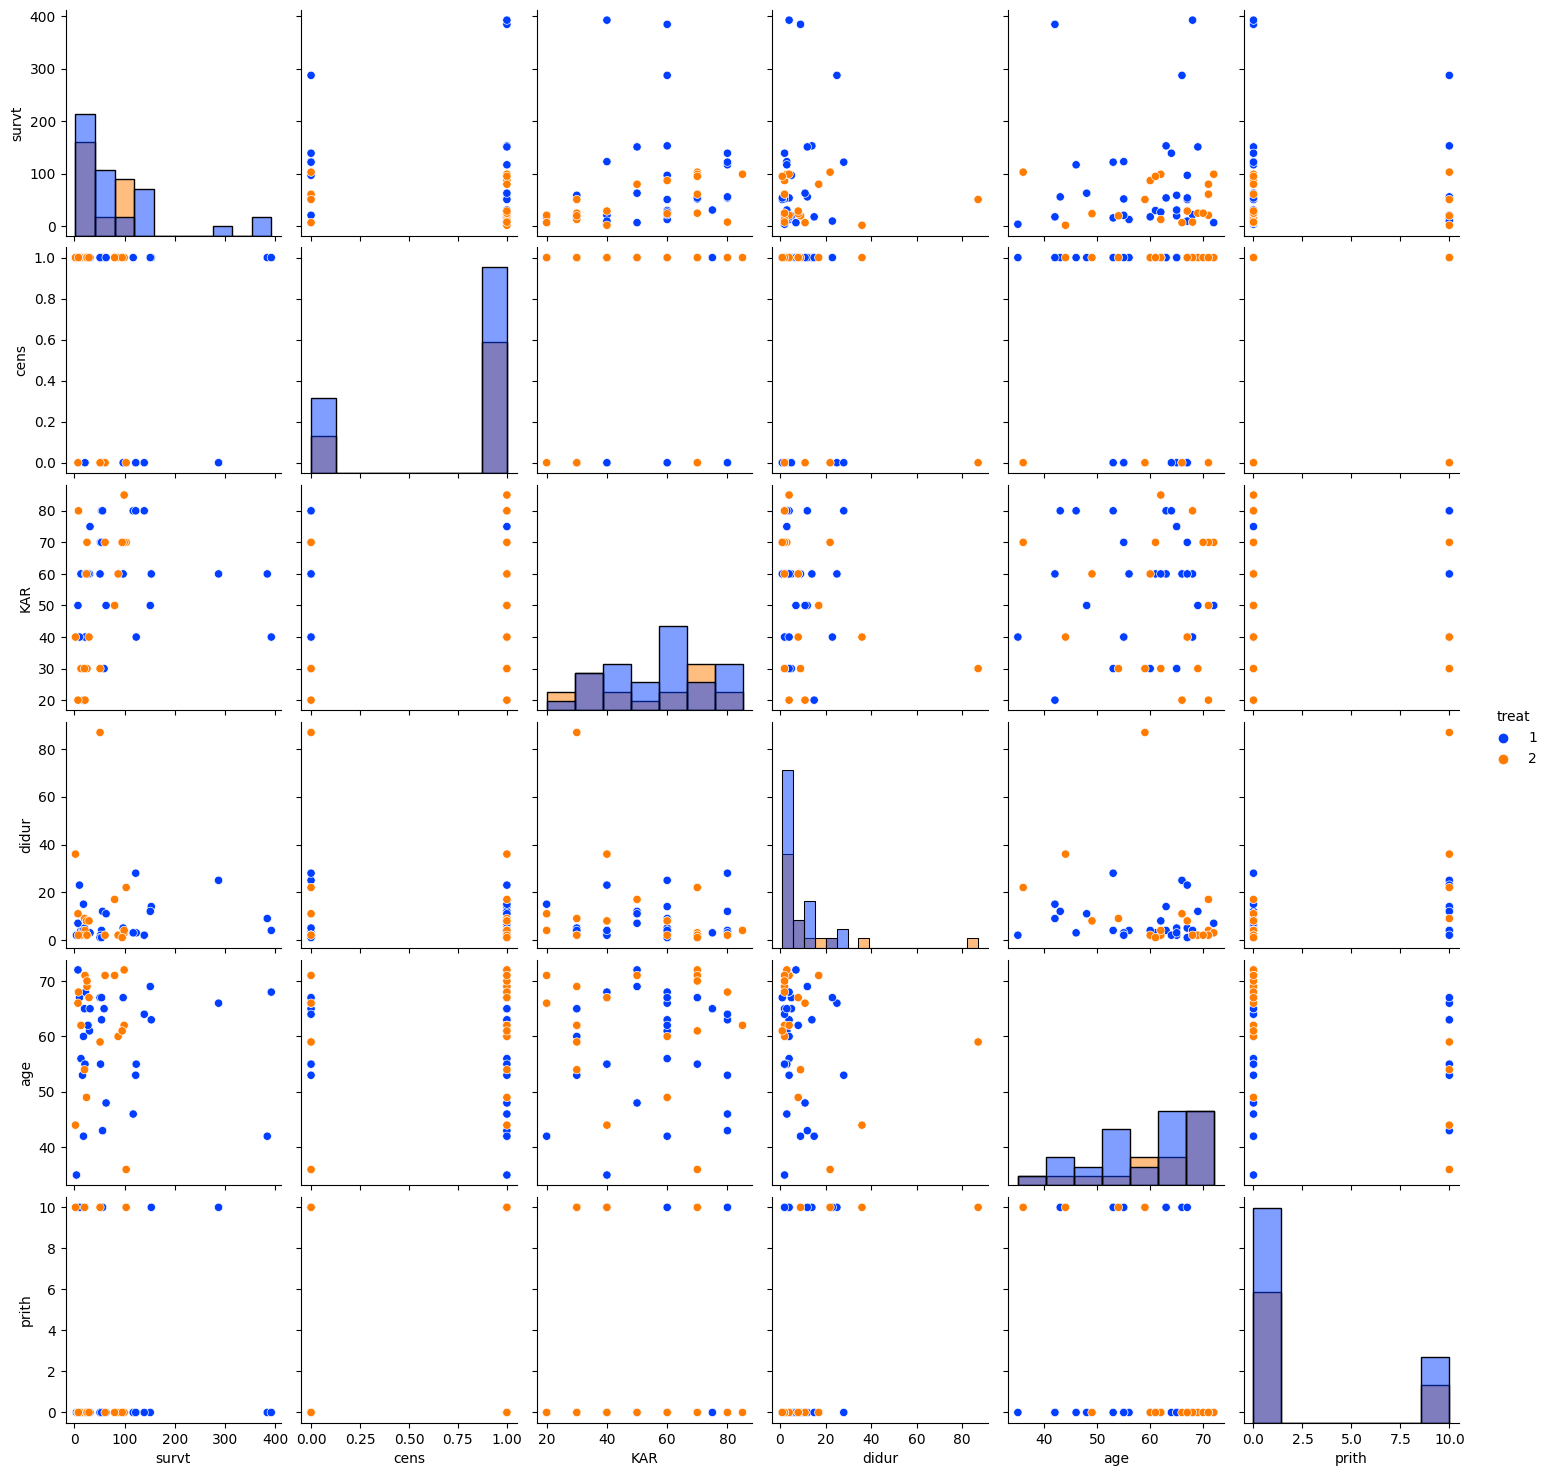

In [69]:
sbn.pairplot(data=data, hue='treat', palette='bright', 
             vars=['survt', 'cens', 'KAR', 'didur', 'age', 'prith'], 
             diag_kind='hist')
plt.savefig('protokol/img/pairplot_my_data_huebytreat.png', dpi=2500)
plt.show() 

In [ ]:
whos